In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mat
import pandas as pd
import numpy as np
from tabulate import tabulate

In [2]:
brazil_data = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
brazil_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
brazil_data.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [4]:
brazil_data.shape

(10692, 13)

In [5]:
brazil_data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
brazil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [7]:
brazil_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# level 1 univariate analysis


In [8]:
#seperate the numeriacal and categorical columns
# numeriacal  columns
a = brazil_data.select_dtypes(exclude = "object")
a

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973
2,80,1,1,1,6,1000,2800,0,41,3841
3,51,2,1,0,2,270,1112,22,17,1421
4,25,1,1,0,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,1926
10688,285,4,4,4,17,3100,15000,973,191,19260
10689,70,3,3,0,8,980,6000,332,78,7390
10690,120,2,2,2,8,1585,12000,279,155,14020


In [9]:
b = brazil_data.select_dtypes(include = "object")
b

,city,animal,furniture
0,São Paulo,acept,furnished
1,São Paulo,acept,not furnished
2,Porto Alegre,acept,not furnished
3,Porto Alegre,acept,not furnished
4,São Paulo,not acept,not furnished
...,...,...,...
10687,Porto Alegre,not acept,furnished
10688,São Paulo,acept,not furnished
10689,Rio de Janeiro,not acept,furnished
10690,Rio de Janeiro,acept,furnished


In [10]:
a_list = list(a.columns)
a_list

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [11]:
b_list = list(b.columns)
b_list

['city', 'animal', 'furniture']

In [12]:
from tabulate import tabulate

In [13]:
table = [a_list,b_list]
print(tabulate({"categorical column" :b_list,"numerical column" : a_list},
              headers = ["categorical column","numerical column"]))

categorical column    numerical column
--------------------  -------------------
city                  area
animal                rooms
furniture             bathroom
                      parking spaces
                      floor
                      hoa (R$)
                      rent amount (R$)
                      property tax (R$)
                      fire insurance (R$)
                      total (R$)


In [14]:
def info_cat_columns(col):
    print("Total unique values:",brazil_data[col].nunique())
    print("Mode value in a column:",brazil_data[col].mode()[0])
    print("Null values:",brazil_data[col].isnull().sum())

In [15]:
info_cat_columns("city")

Total unique values: 5
Mode value in a column: São Paulo
Null values: 0


In [16]:
info_cat_columns("animal")

Total unique values: 2
Mode value in a column: acept
Null values: 0


In [17]:
info_cat_columns("furniture")

Total unique values: 2
Mode value in a column: not furnished
Null values: 0


In [18]:
info_cat_columns("rooms")

Total unique values: 11
Mode value in a column: 3
Null values: 0


In [19]:
info_cat_columns("bathroom")

Total unique values: 10
Mode value in a column: 1
Null values: 0


In [20]:
info_cat_columns("parking spaces")

Total unique values: 11
Mode value in a column: 1
Null values: 0


In [21]:
def info_num_columns(col):
    print("Mean: ",brazil_data[col].mean())
    print("Median: ",brazil_data[col].median())
    print("Mode: ",brazil_data[col].mode()[0])
    print("Missing_values: ",brazil_data[col].isnull().sum())
    print("Standard Deviation: ",brazil_data[col].std())
    print("Minimum: ",brazil_data[col].min())
    print("Miximum: ",brazil_data[col].max())


In [22]:
info_num_columns('area')

Mean:  149.21791994014217
Median:  90.0
Mode:  50
Missing_values:  0
Standard Deviation:  537.0169423364867
Minimum:  11
Miximum:  46335


In [23]:
info_num_columns('hoa (R$)')

Mean:  1174.0216984661429
Median:  560.0
Mode:  0
Missing_values:  0
Standard Deviation:  15592.305248403356
Minimum:  0
Miximum:  1117000


In [24]:
info_num_columns('rent amount (R$)')

Mean:  3896.247194163861
Median:  2661.0
Mode:  2500
Missing_values:  0
Standard Deviation:  3408.5455176710816
Minimum:  450
Miximum:  45000


In [25]:
info_num_columns('property tax (R$)')

Mean:  366.70435839880287
Median:  125.0
Mode:  0
Missing_values:  0
Standard Deviation:  3107.832321161917
Minimum:  0
Miximum:  313700


In [26]:
info_num_columns('fire insurance (R$)')

Mean:  53.300879161990274
Median:  36.0
Mode:  16
Missing_values:  0
Standard Deviation:  47.768030930197206
Minimum:  3
Miximum:  677


In [27]:
info_num_columns('total (R$)')

Mean:  5490.4869996258885
Median:  3581.5
Mode:  2555
Missing_values:  0
Standard Deviation:  16484.72591235027
Minimum:  499
Miximum:  1120000


In [28]:
brazil_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [34]:
#categorical charts
def cat_charts(col):
    list = brazil_data[col].value_counts()
    fig,ax=plt.subplots(1,2,figsize =(18,8))
    ax[0].set_title("count of strings" +str(col))
    labels=brazil_data[col].value_counts().index
    sns.countplot(x=brazil_data[col],ax=ax[0])
    plt.pie(list, labels=labels, autopct ="%.2f%%")
    plt.show()

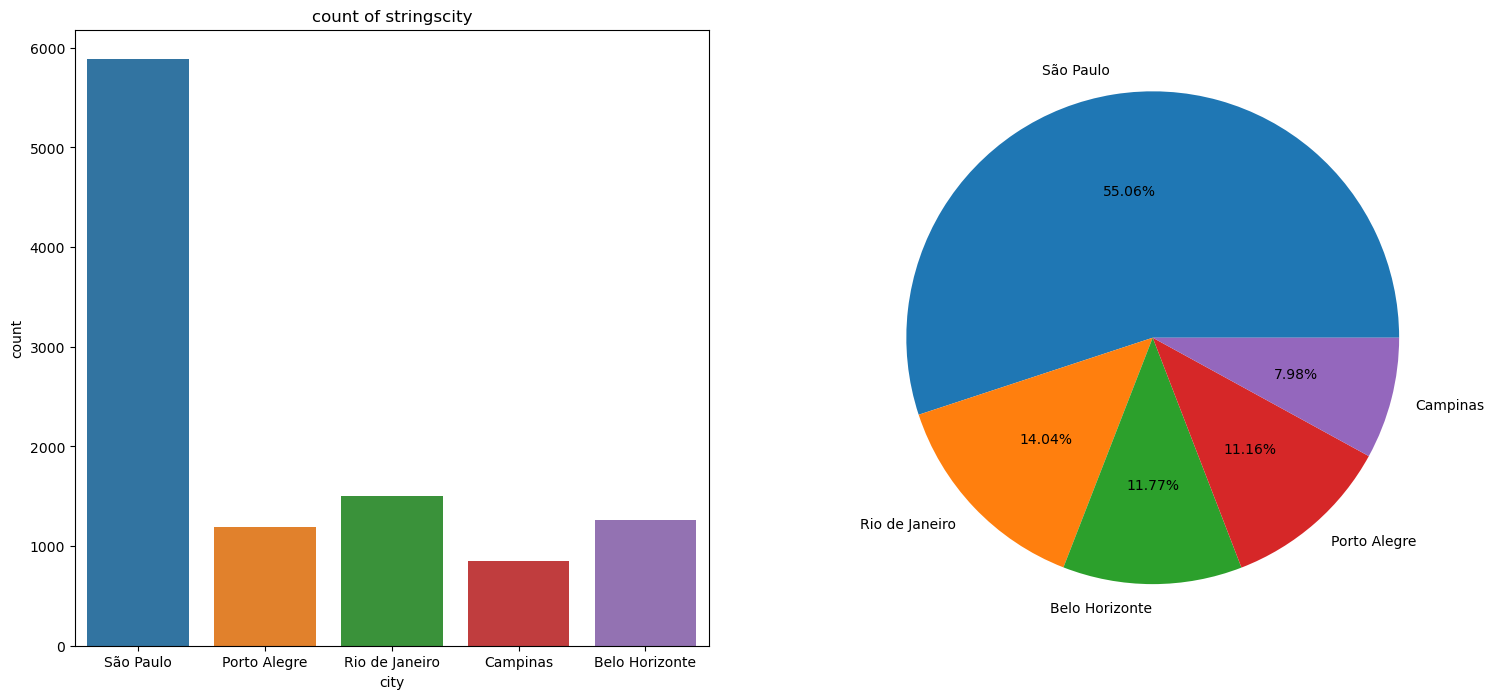

In [35]:
cat_charts("city")

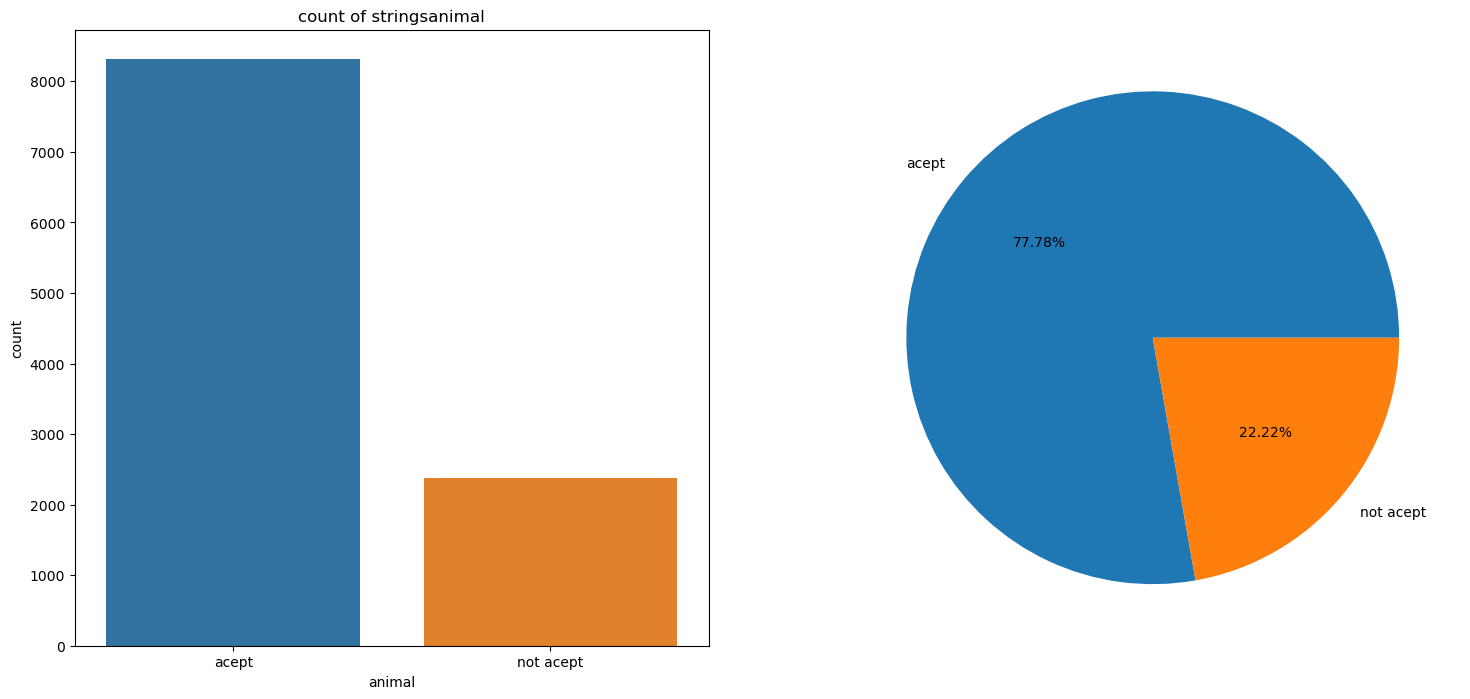

In [36]:
cat_charts("animal")

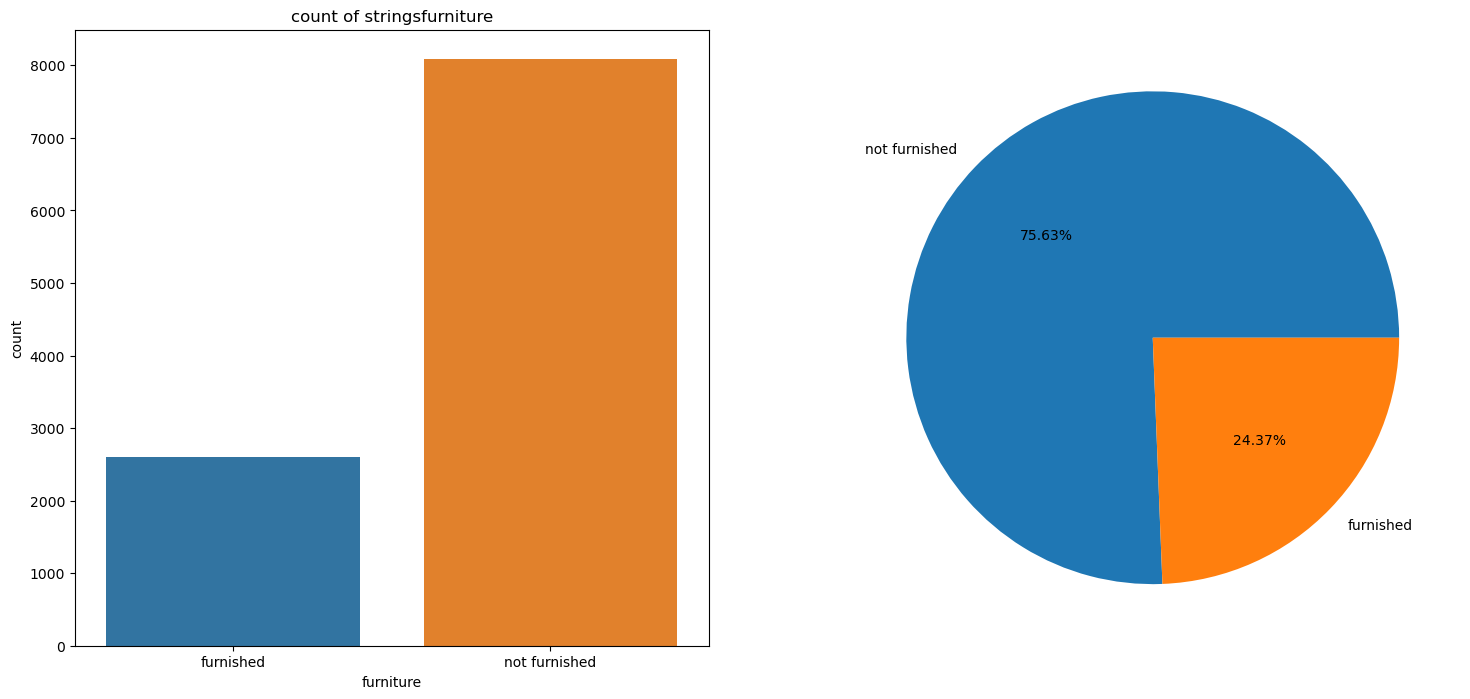

In [37]:

cat_charts("furniture")

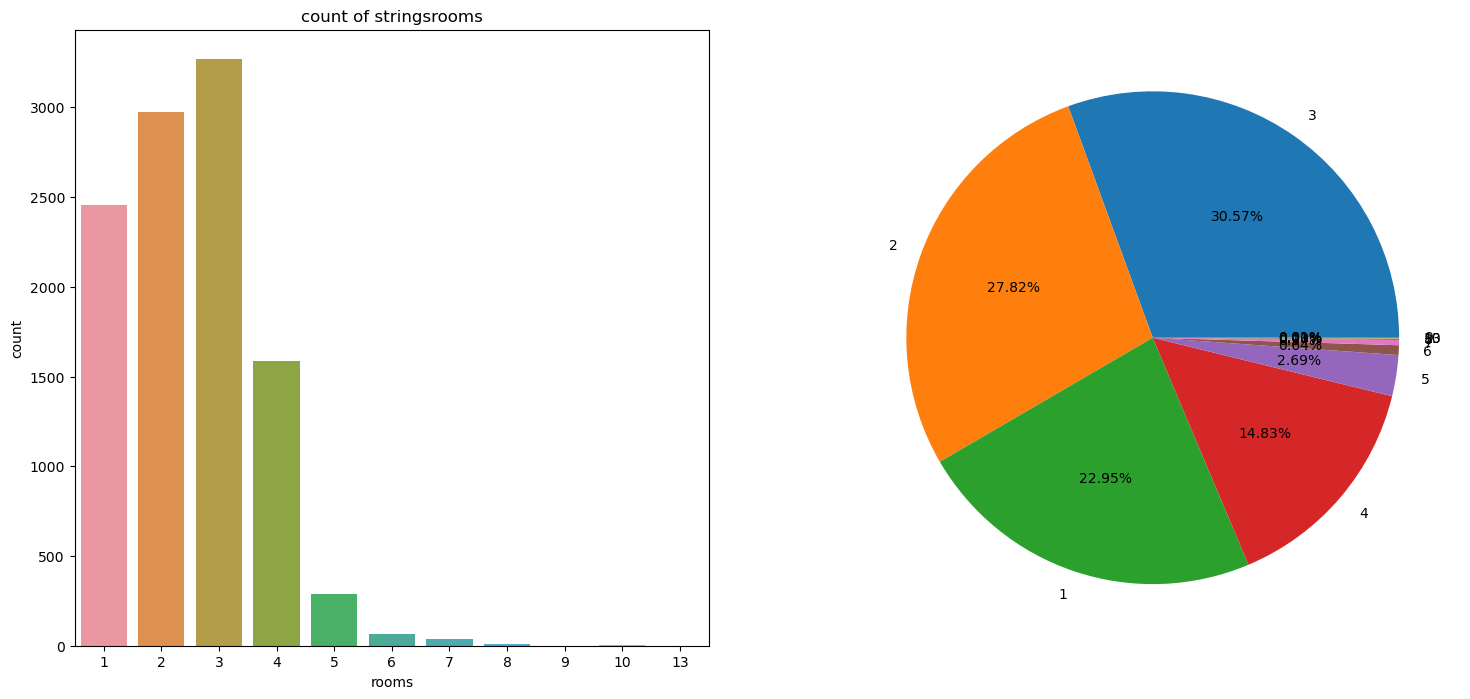

In [38]:
cat_charts("rooms")

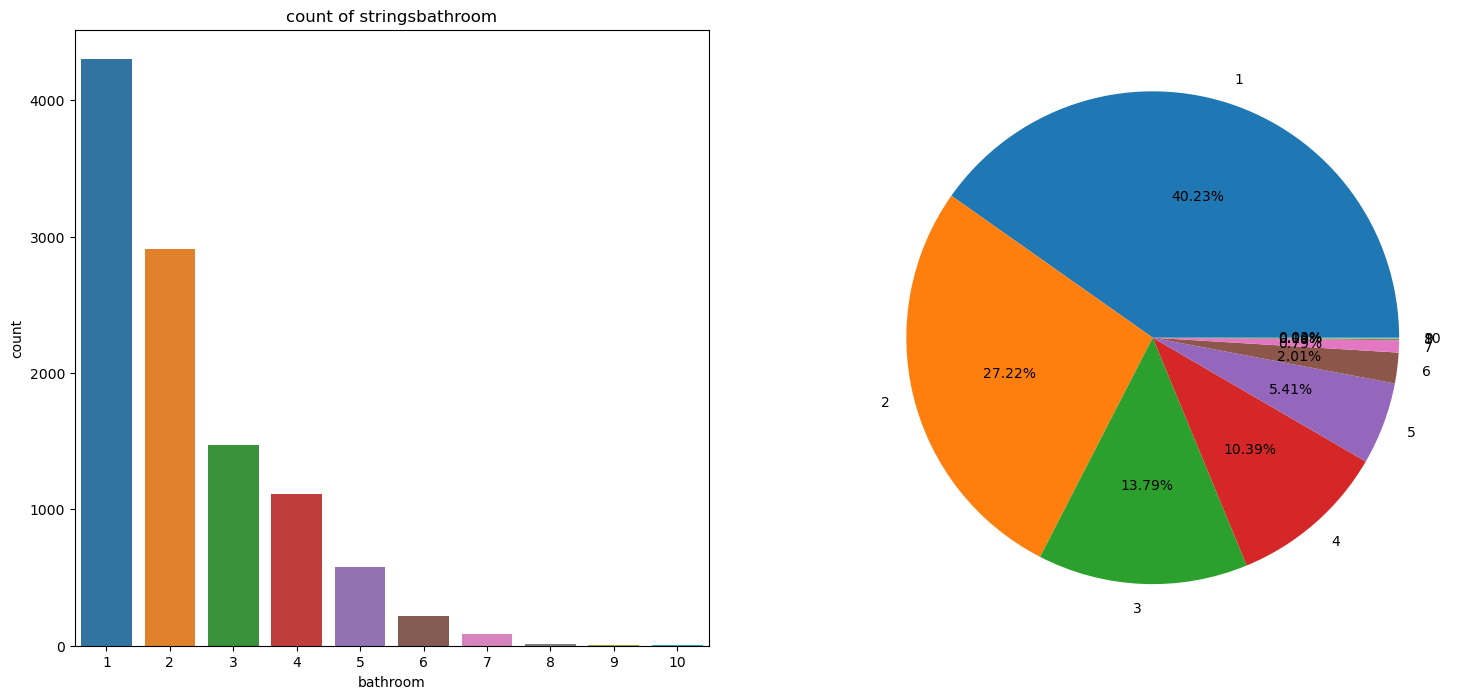

In [39]:

cat_charts("bathroom")

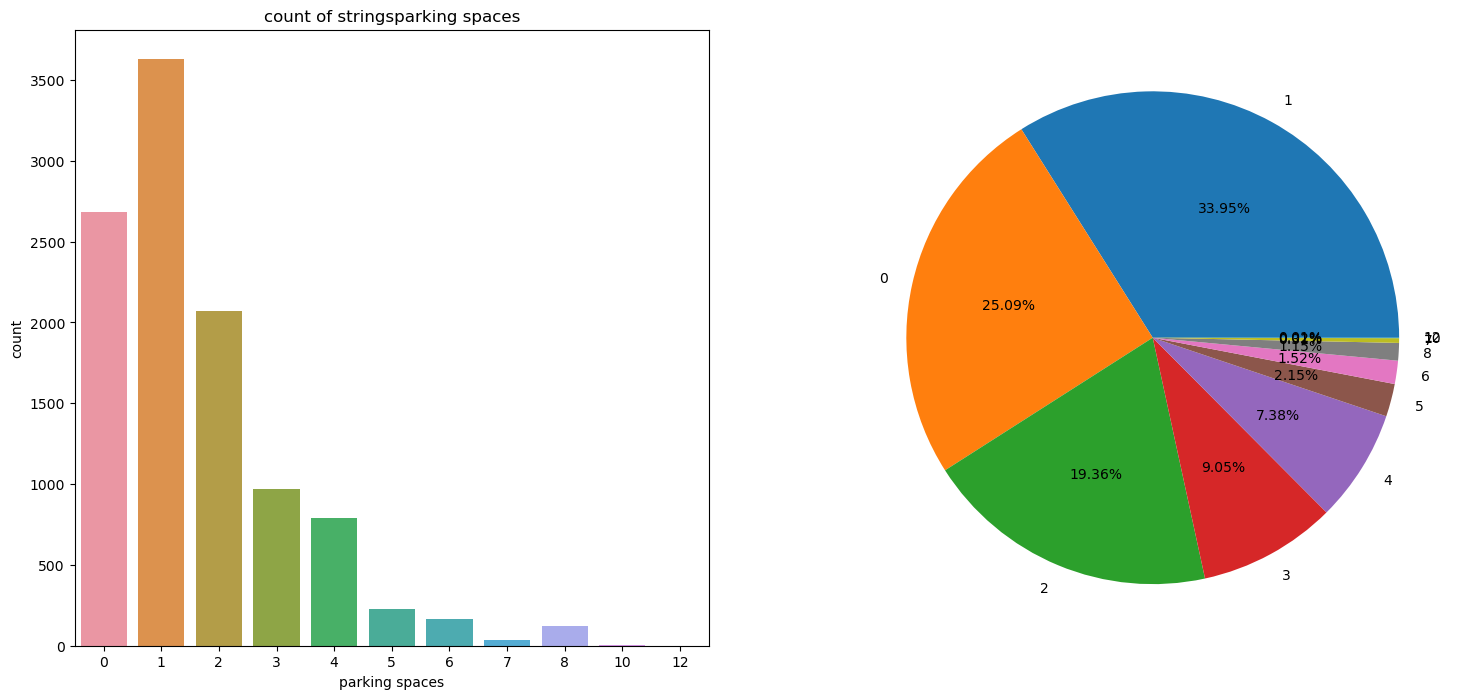

In [40]:
cat_charts("parking spaces")

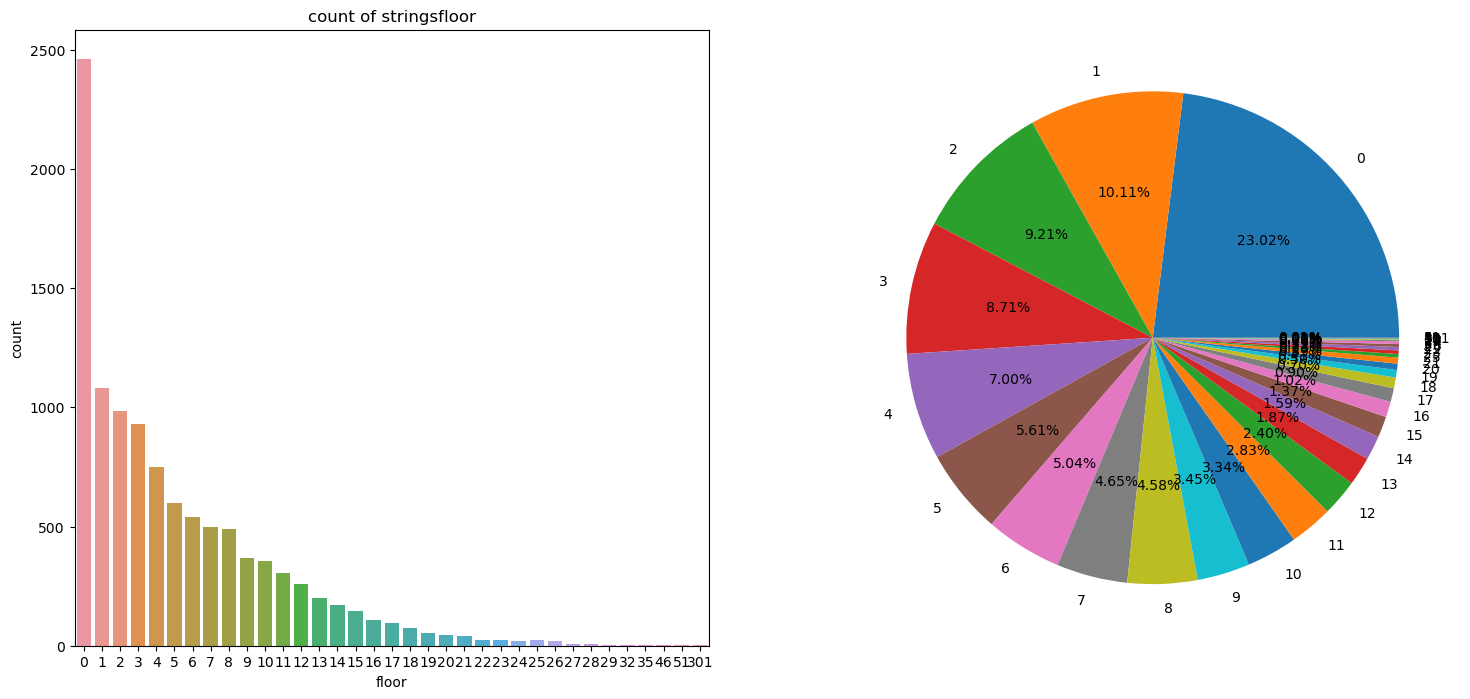

In [41]:
cat_charts("floor")

In [42]:
def num_charts(col):
    fig,ax=plt.subplots(1,2, figsize=(18,8))
    sns.histplot(brazil_data[col], ax=ax[0],color="r")
    sns.boxplot(brazil_data[col],ax=ax[1],color="g")
    plt.show()

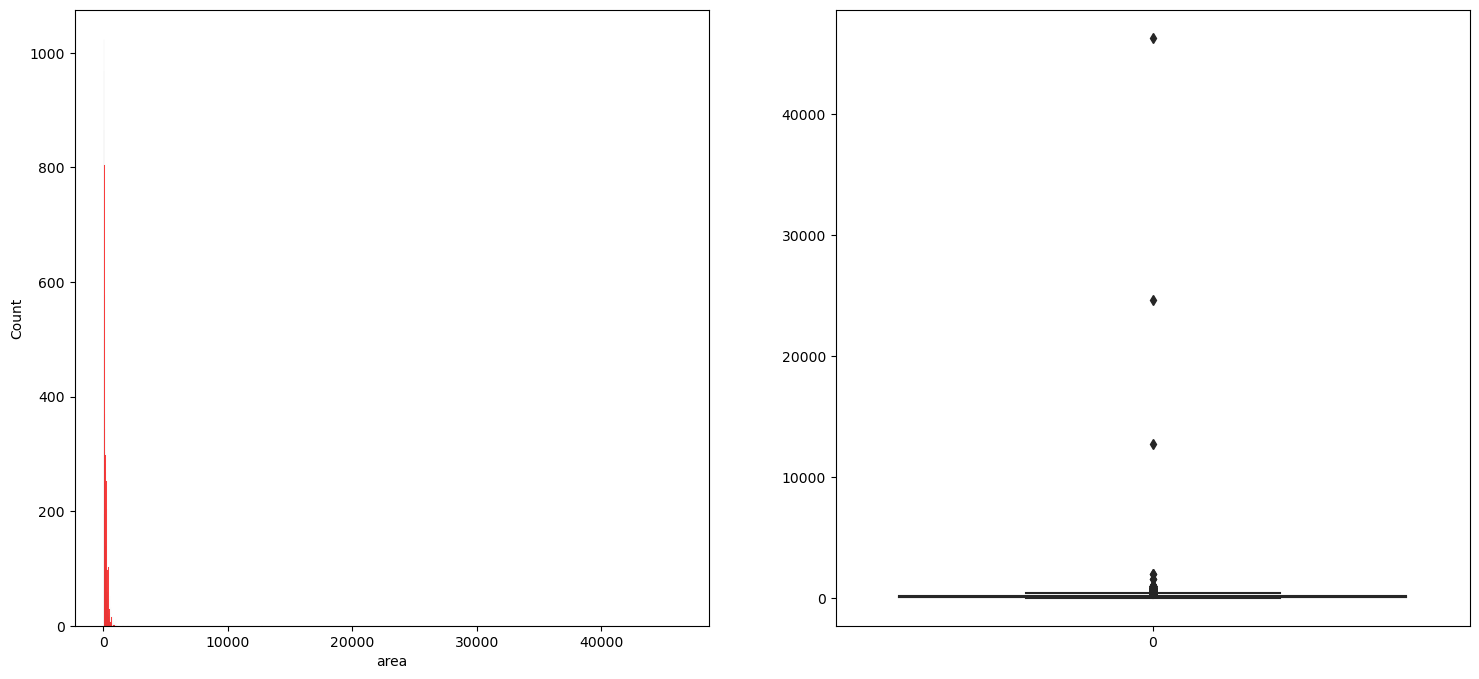

In [43]:
num_charts('area')   

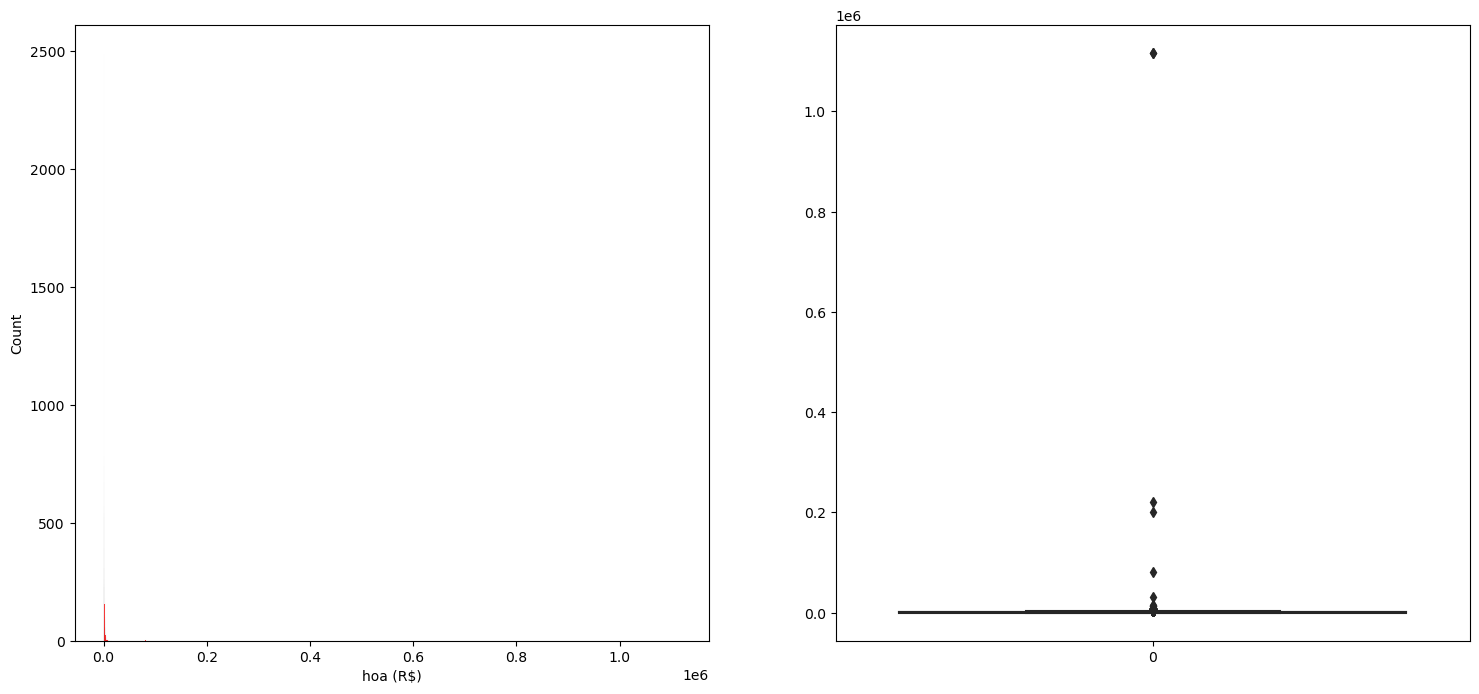

In [44]:
num_charts('hoa (R$)') 

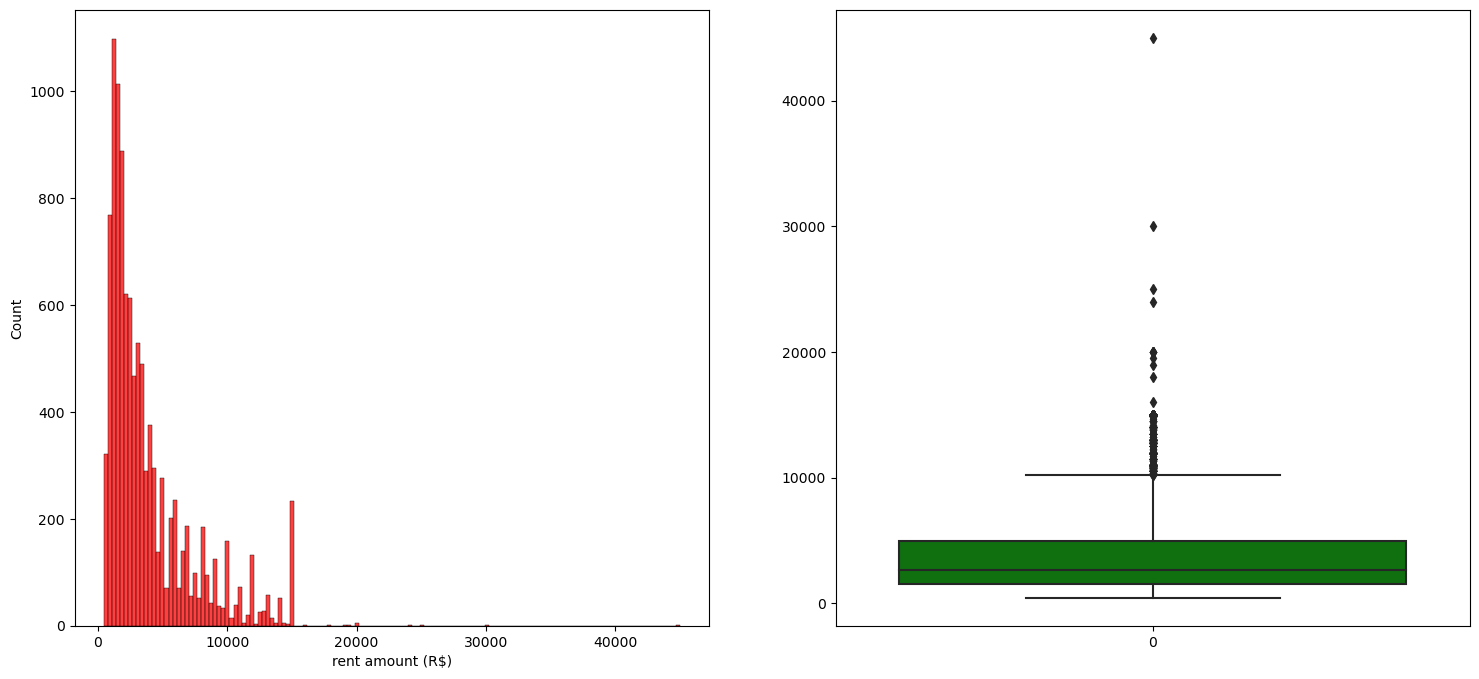

In [45]:
num_charts('rent amount (R$)')

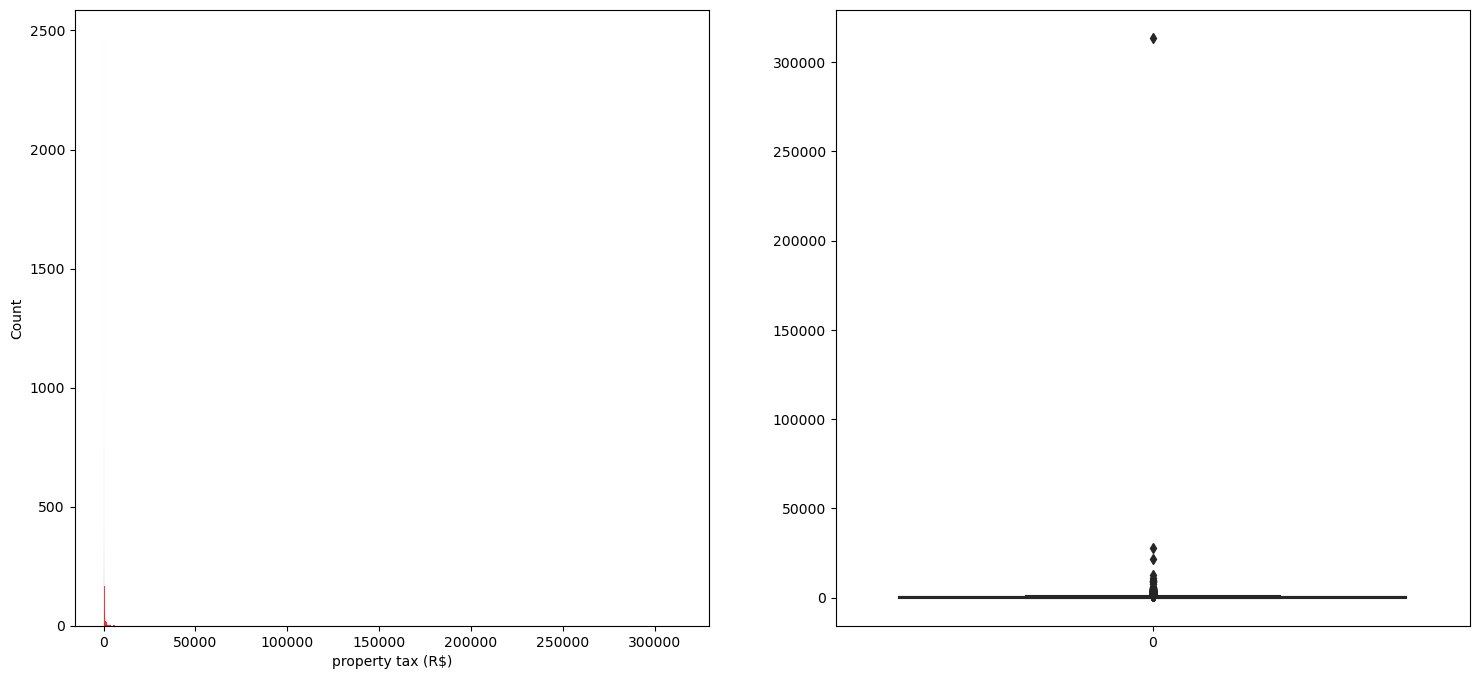

In [46]:
num_charts('property tax (R$)')

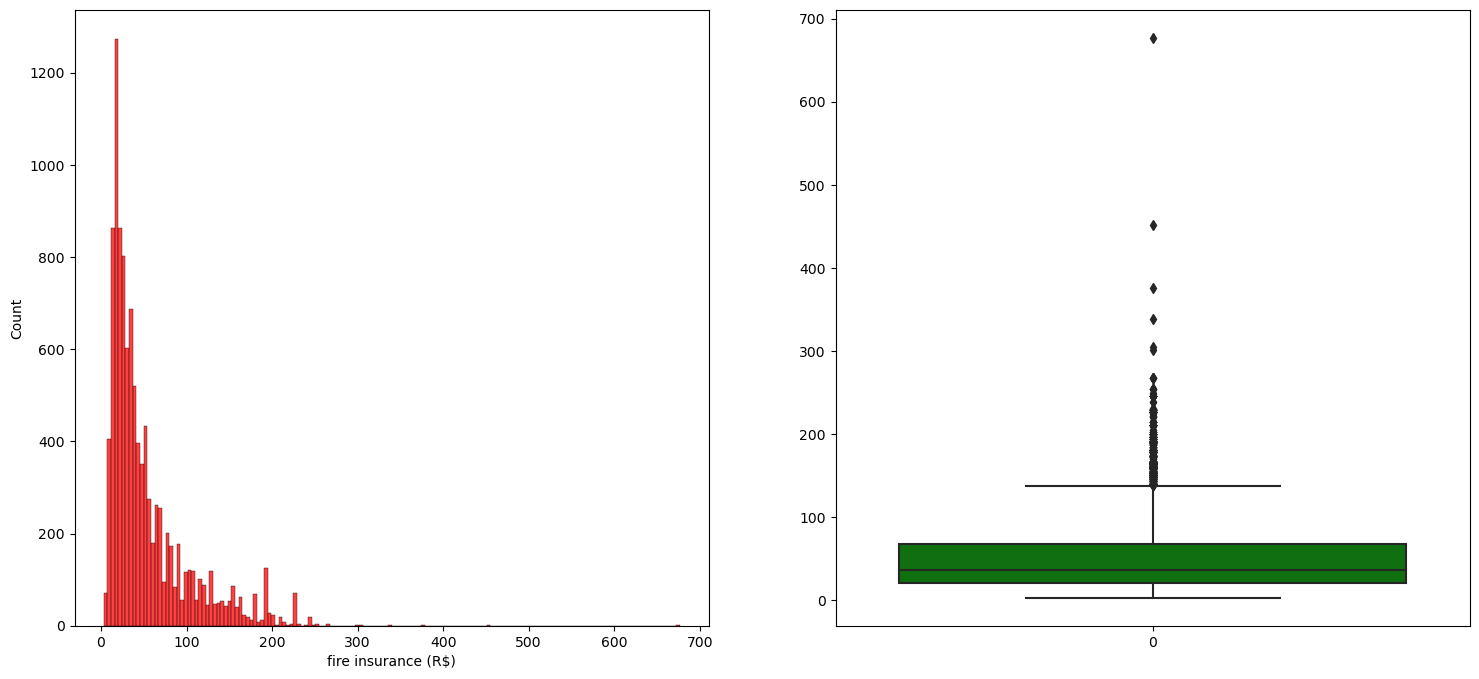

In [47]:
num_charts('fire insurance (R$)')

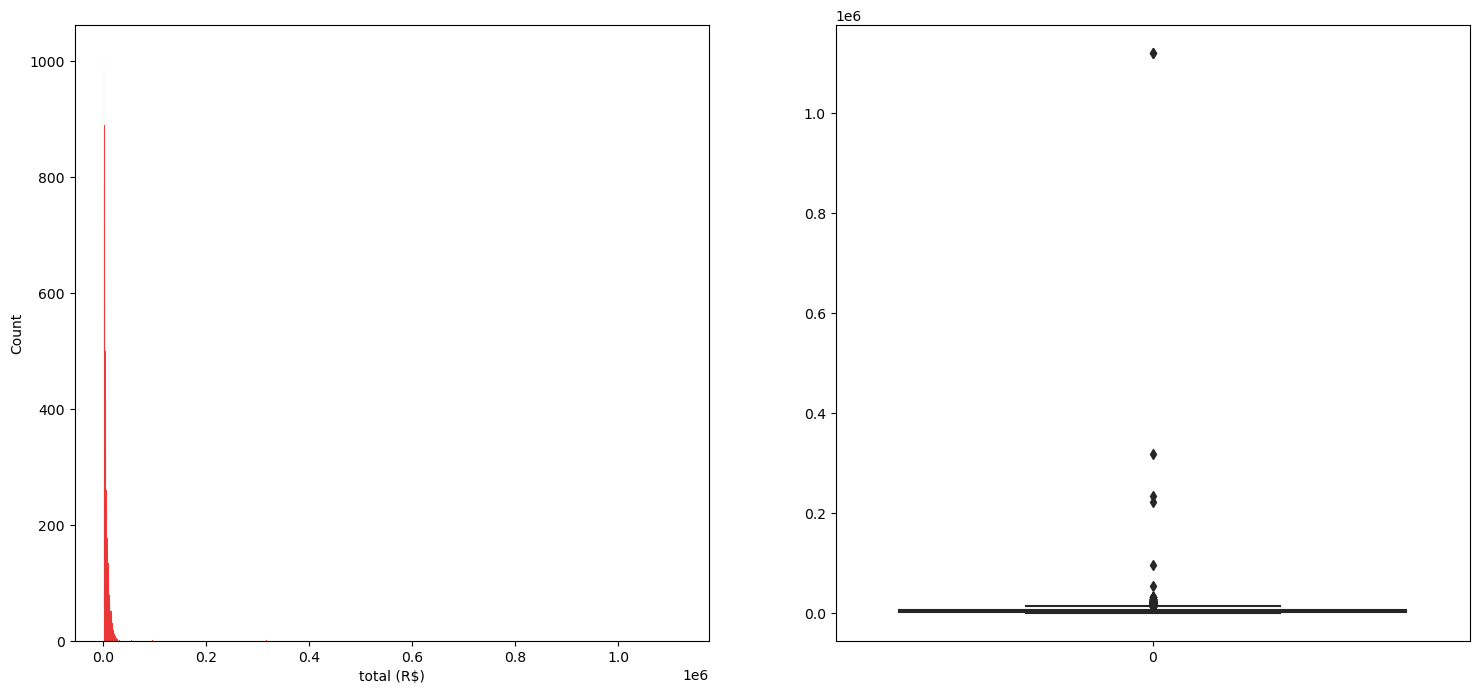

In [48]:
num_charts('total (R$)')

# level 2 Analysis

In [49]:
#cat_cat_analysis

def cat_cat_analysis(cat1,cat2):
    fig,ax=plt.subplots(figsize=(15,8))
    sns.countplot(x=cat1,hue=cat2,data=brazil_data)
    plt.show()


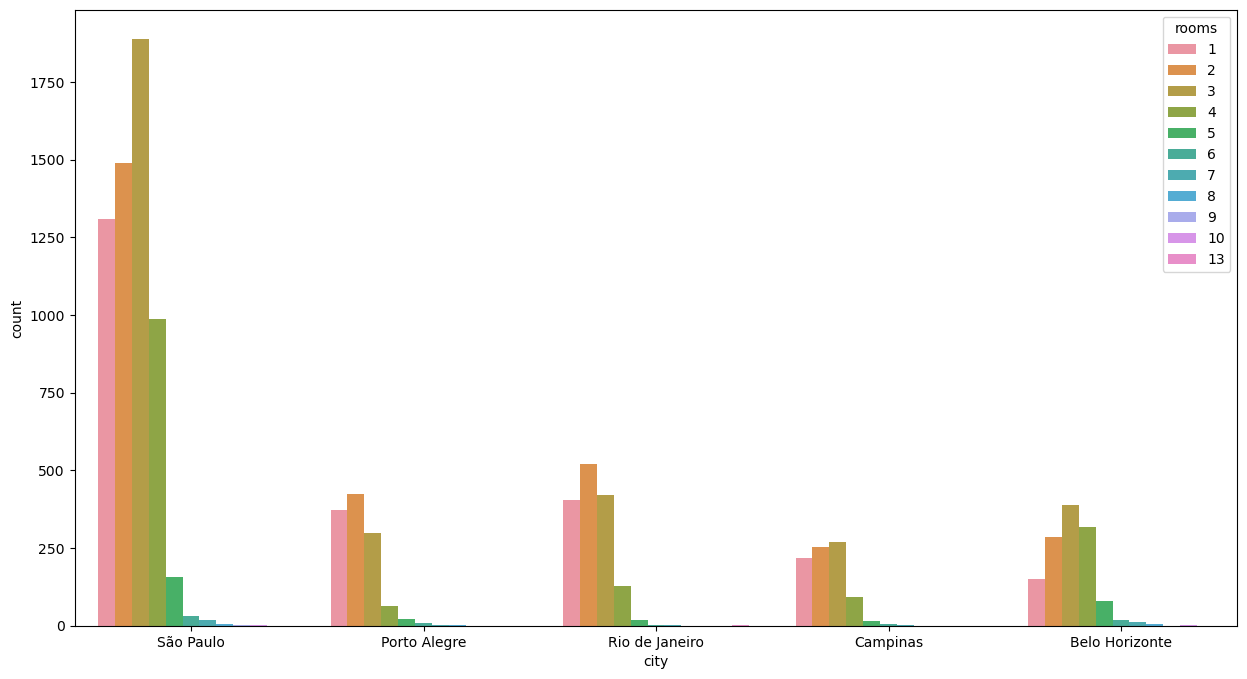

In [50]:
cat_cat_analysis('city','rooms')

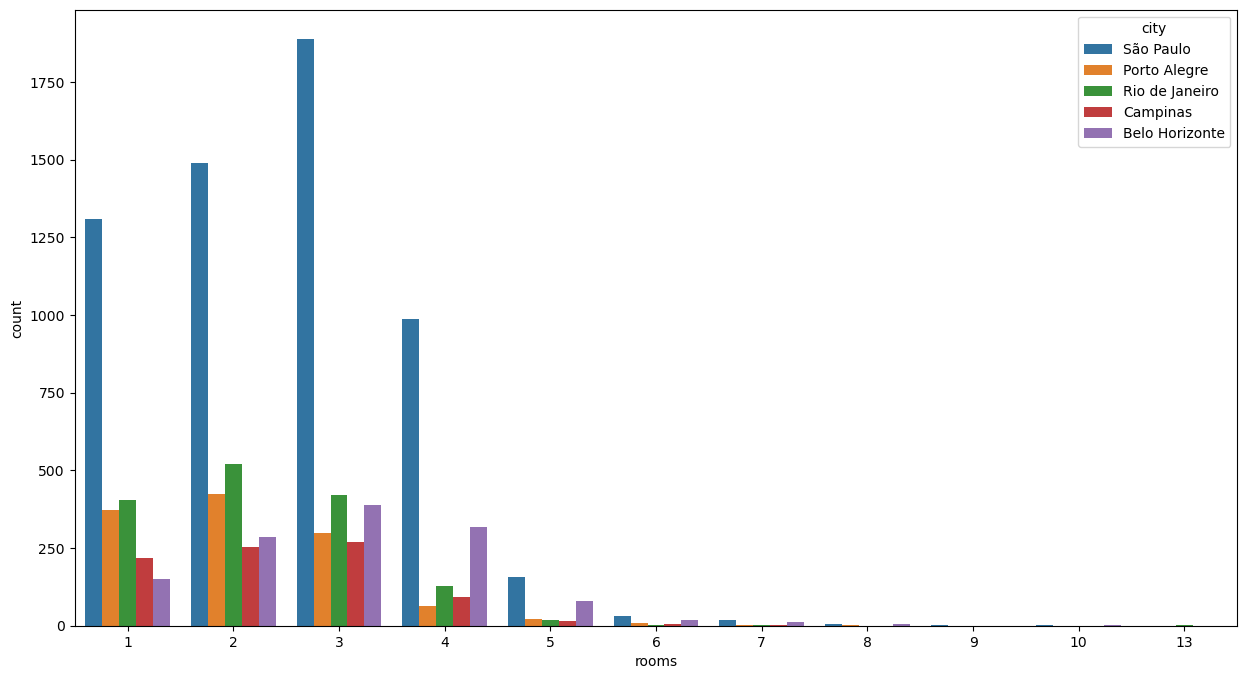

In [51]:
cat_cat_analysis('rooms','city')

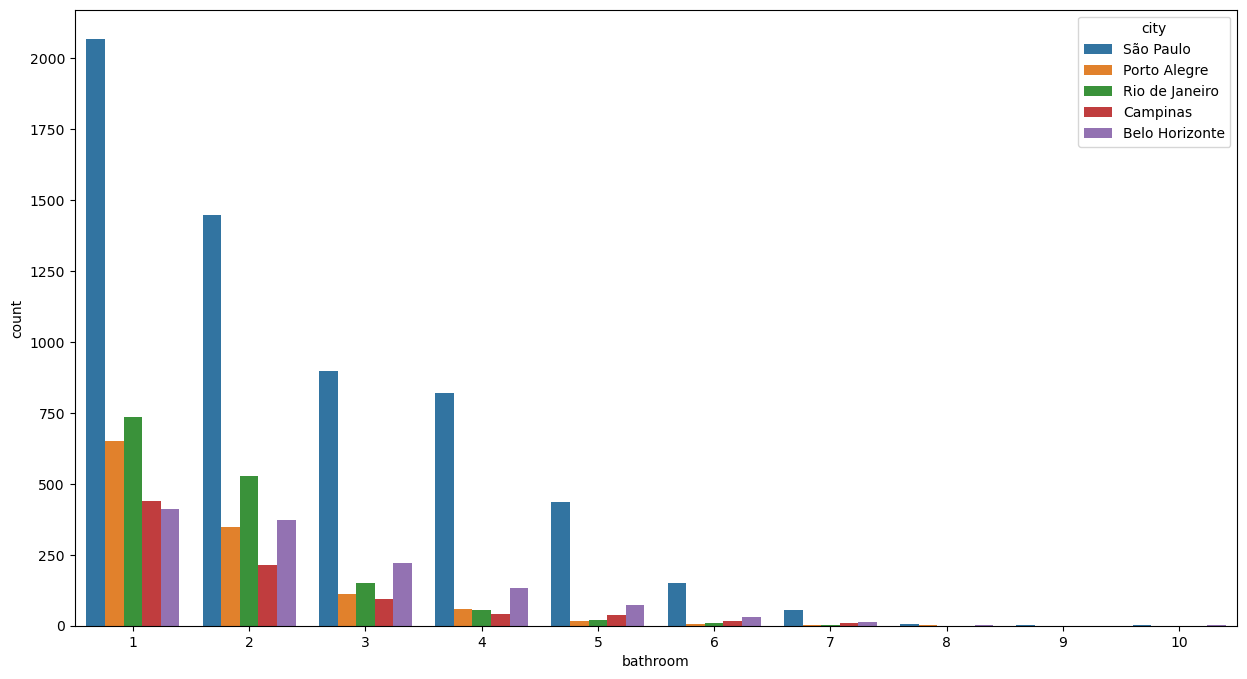

In [52]:
cat_cat_analysis('bathroom','city')

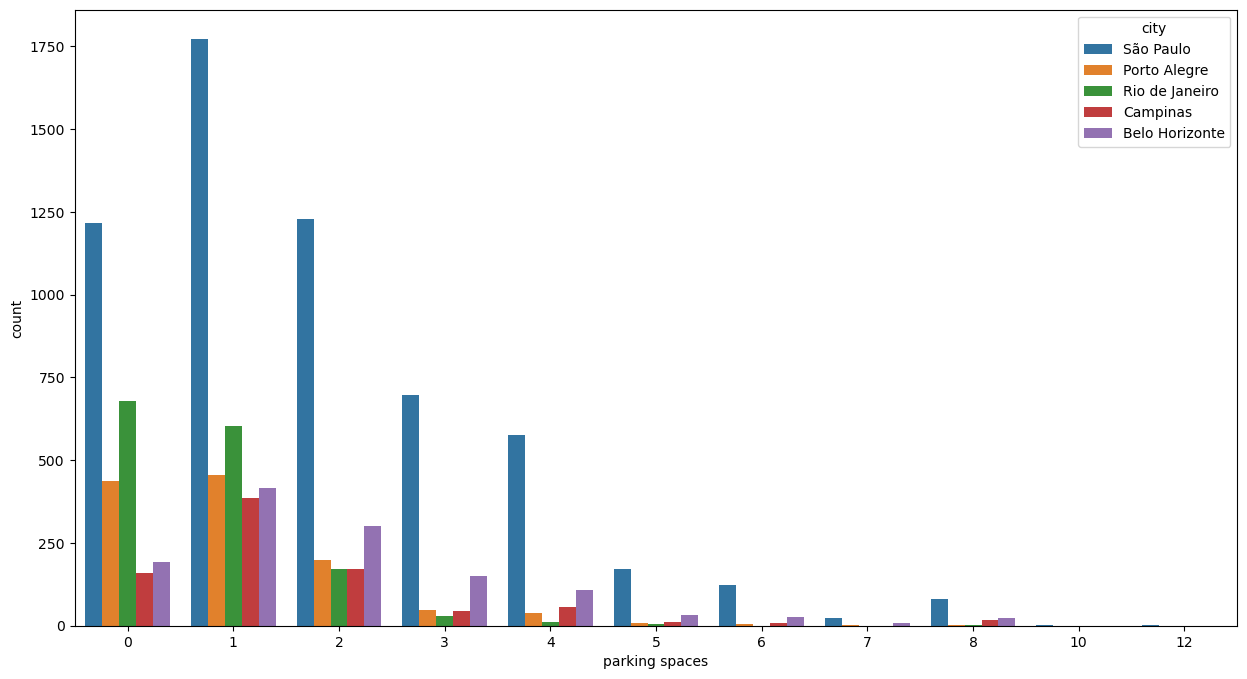

In [53]:
cat_cat_analysis('parking spaces','city')

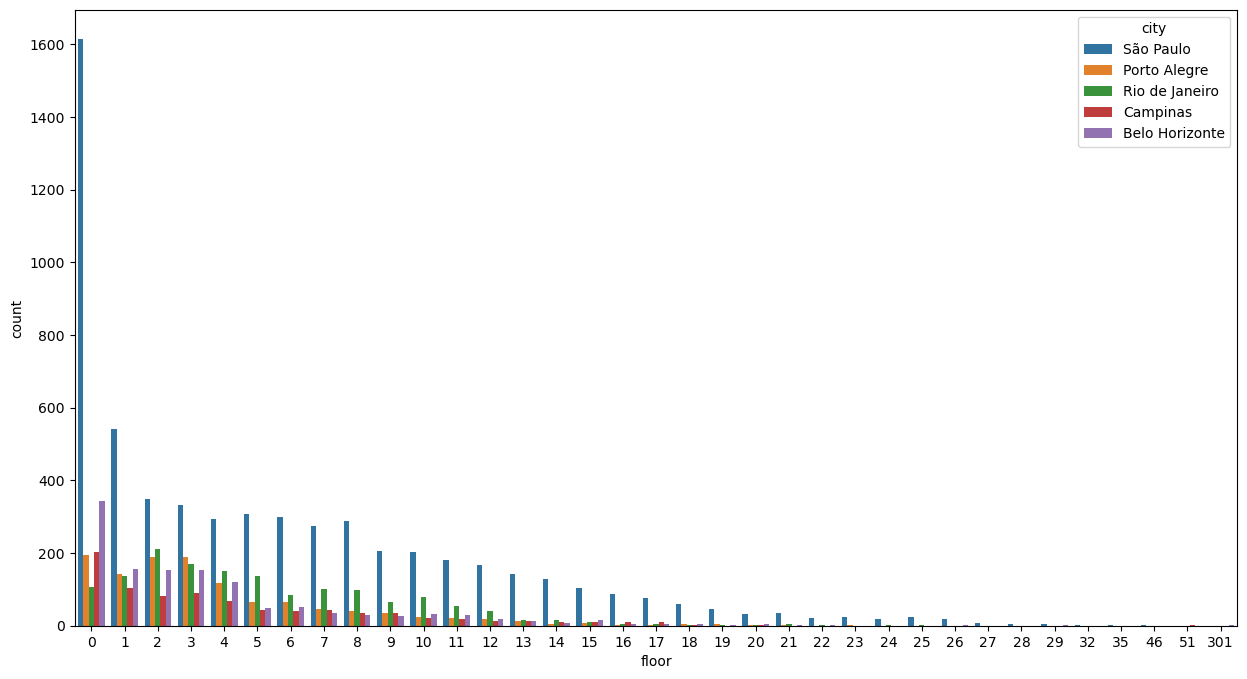

In [54]:
cat_cat_analysis('floor','city')

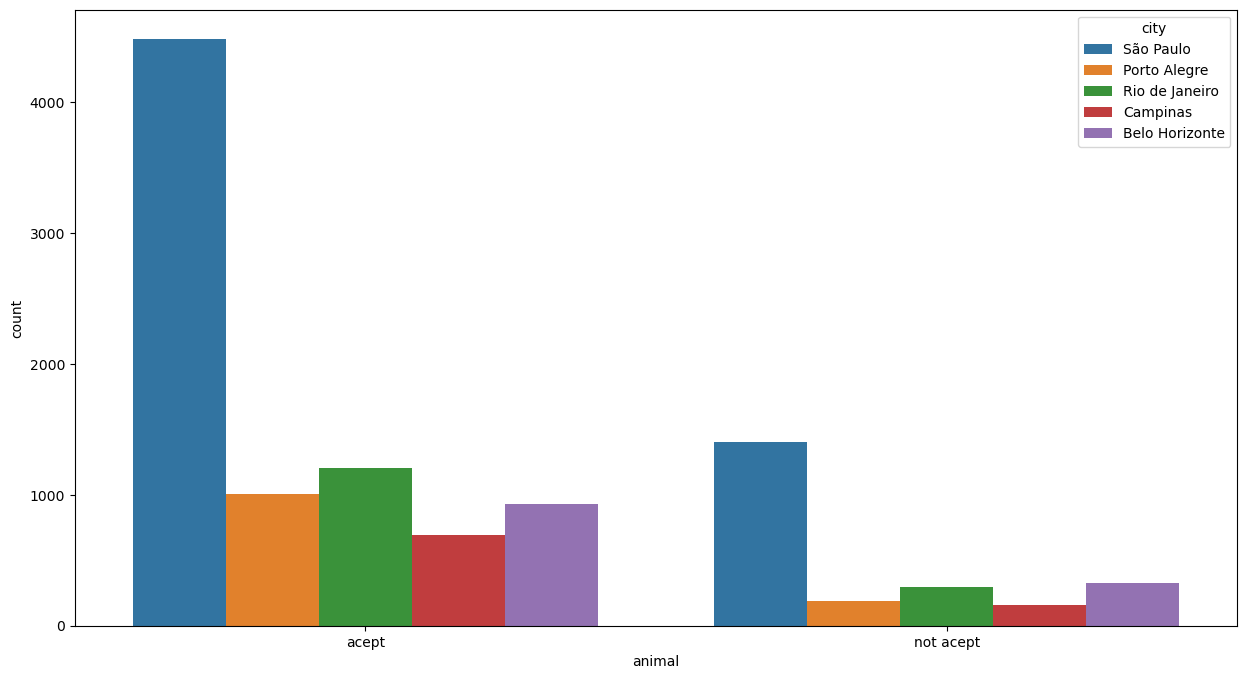

In [55]:
cat_cat_analysis('animal','city')

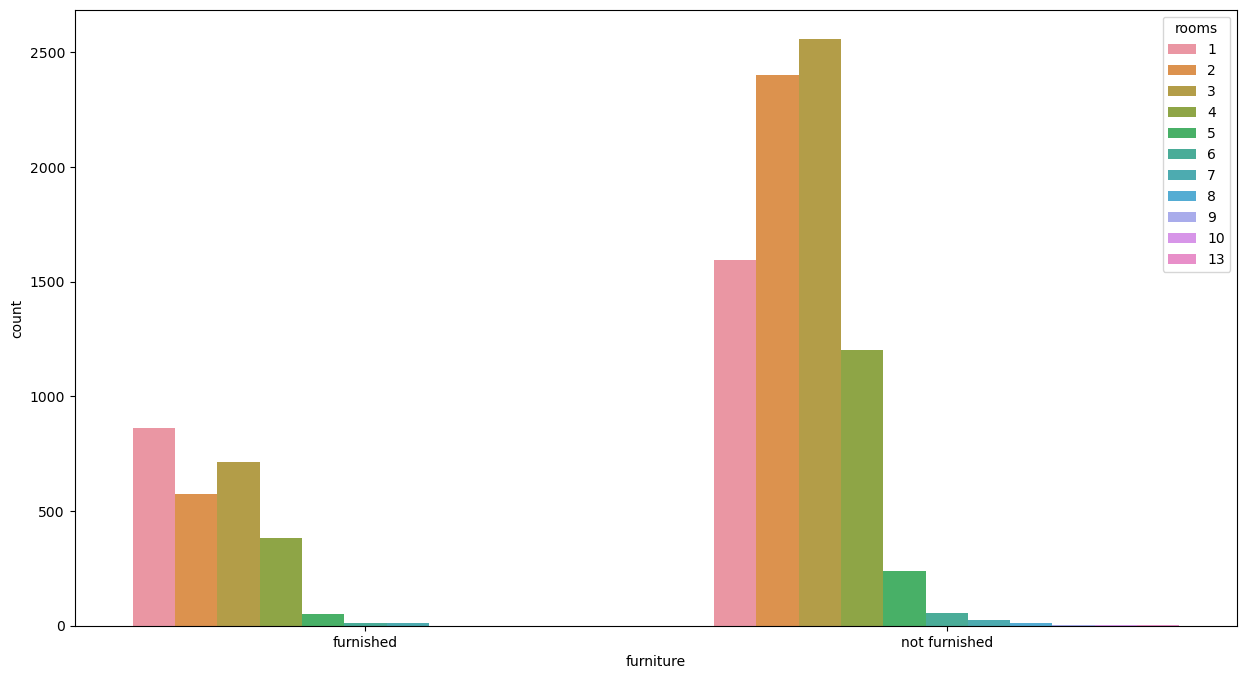

In [56]:
cat_cat_analysis('furniture','rooms')

In [57]:
#cat_num_analysis
def cat_num_analysis(cat,num):
    fig,ax=plt.subplots(1,2,figsize=(20,20))
    sns.histplot(x=brazil_data[num],hue=brazil_data[cat], ax=ax[0])
    sns.boxplot(y=brazil_data[num],x=brazil_data[cat],ax=ax[1])
    plt.show()
    

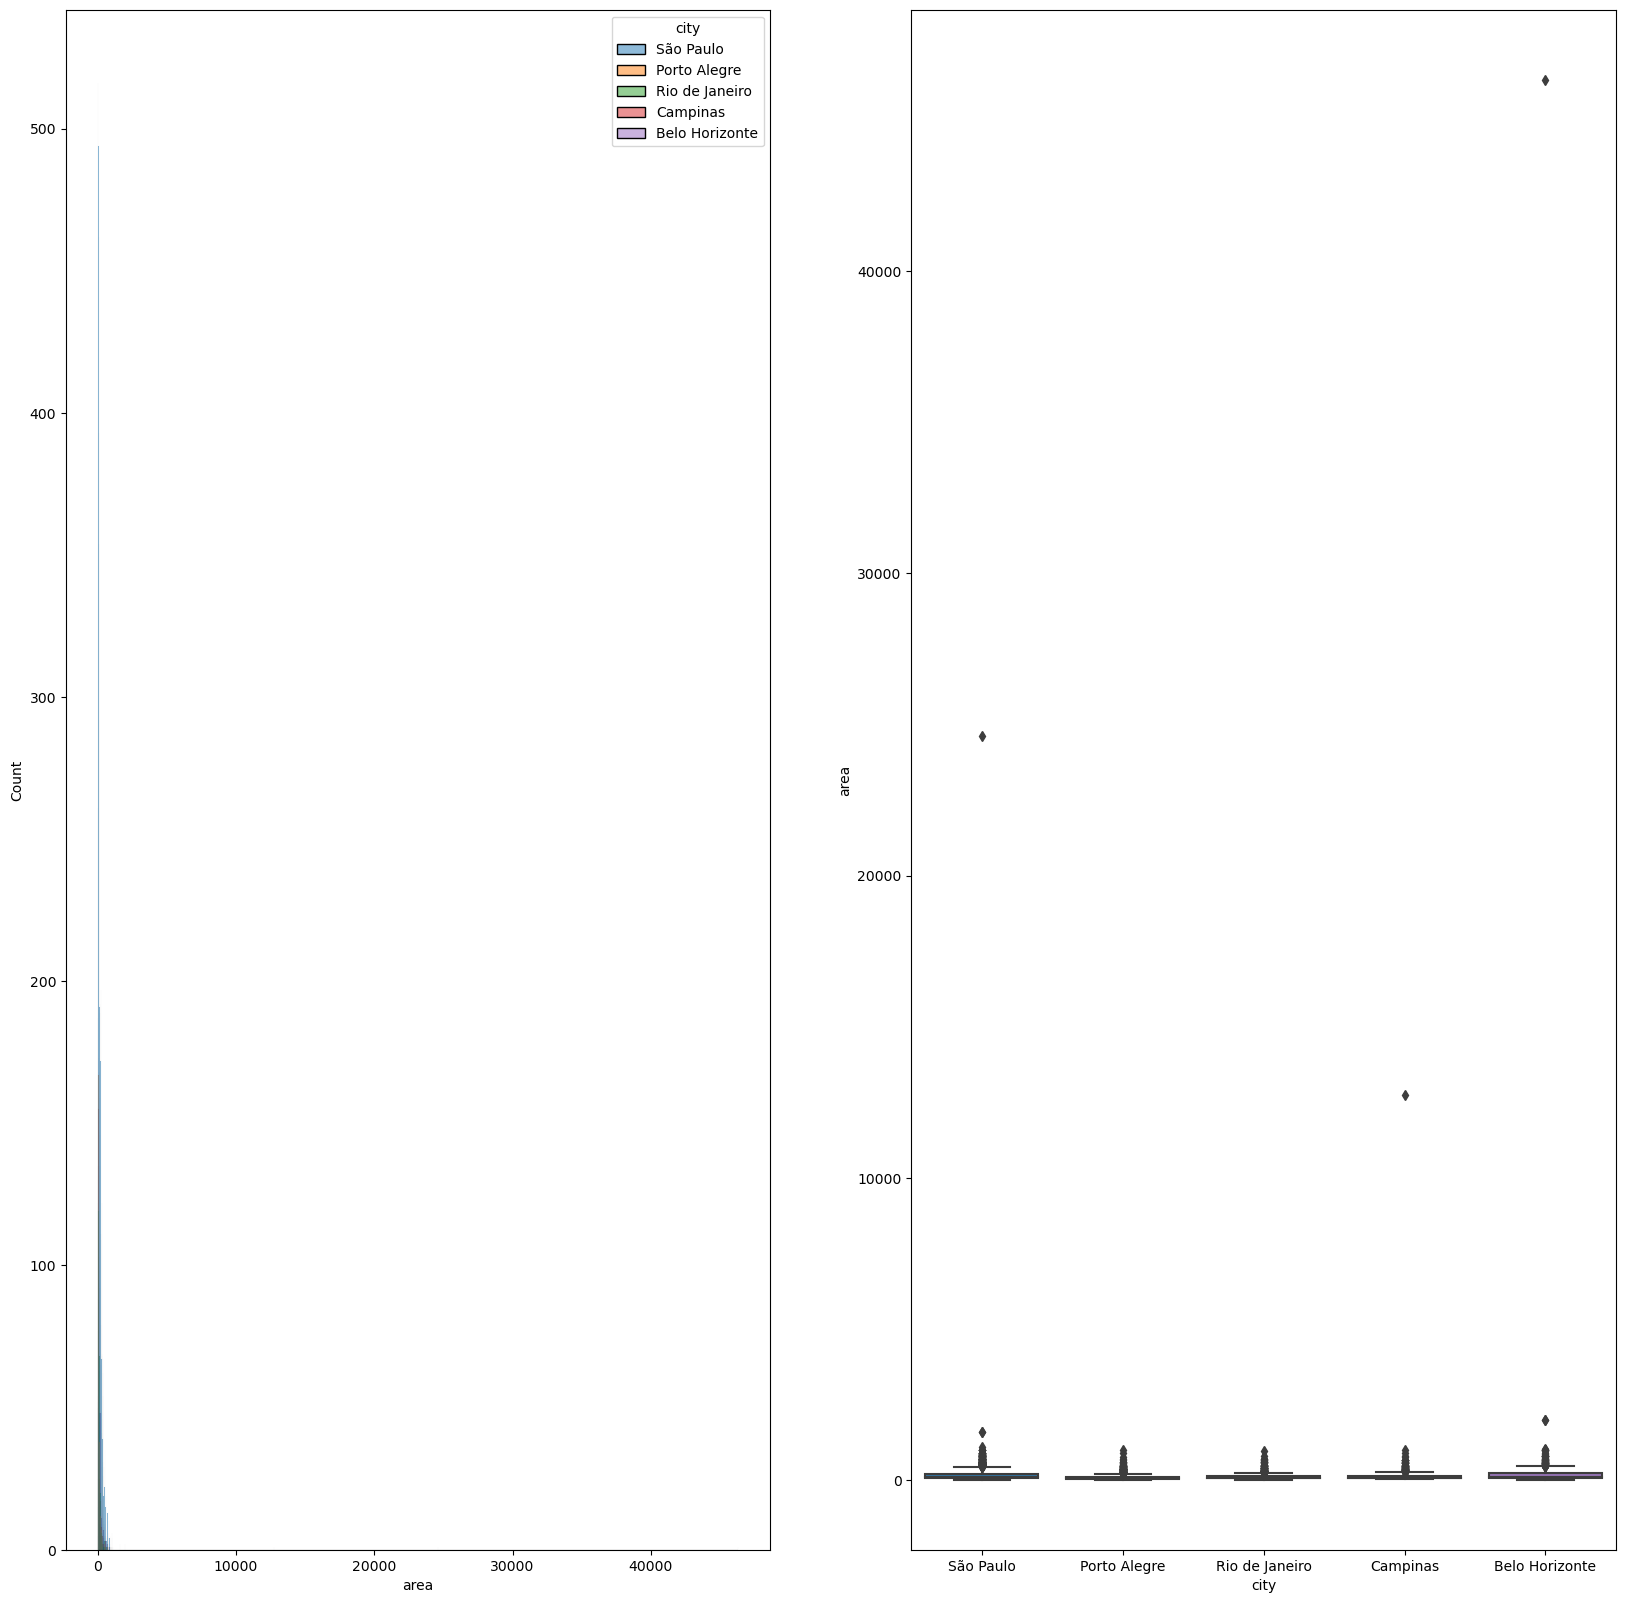

In [58]:
cat_num_analysis('city',"area")

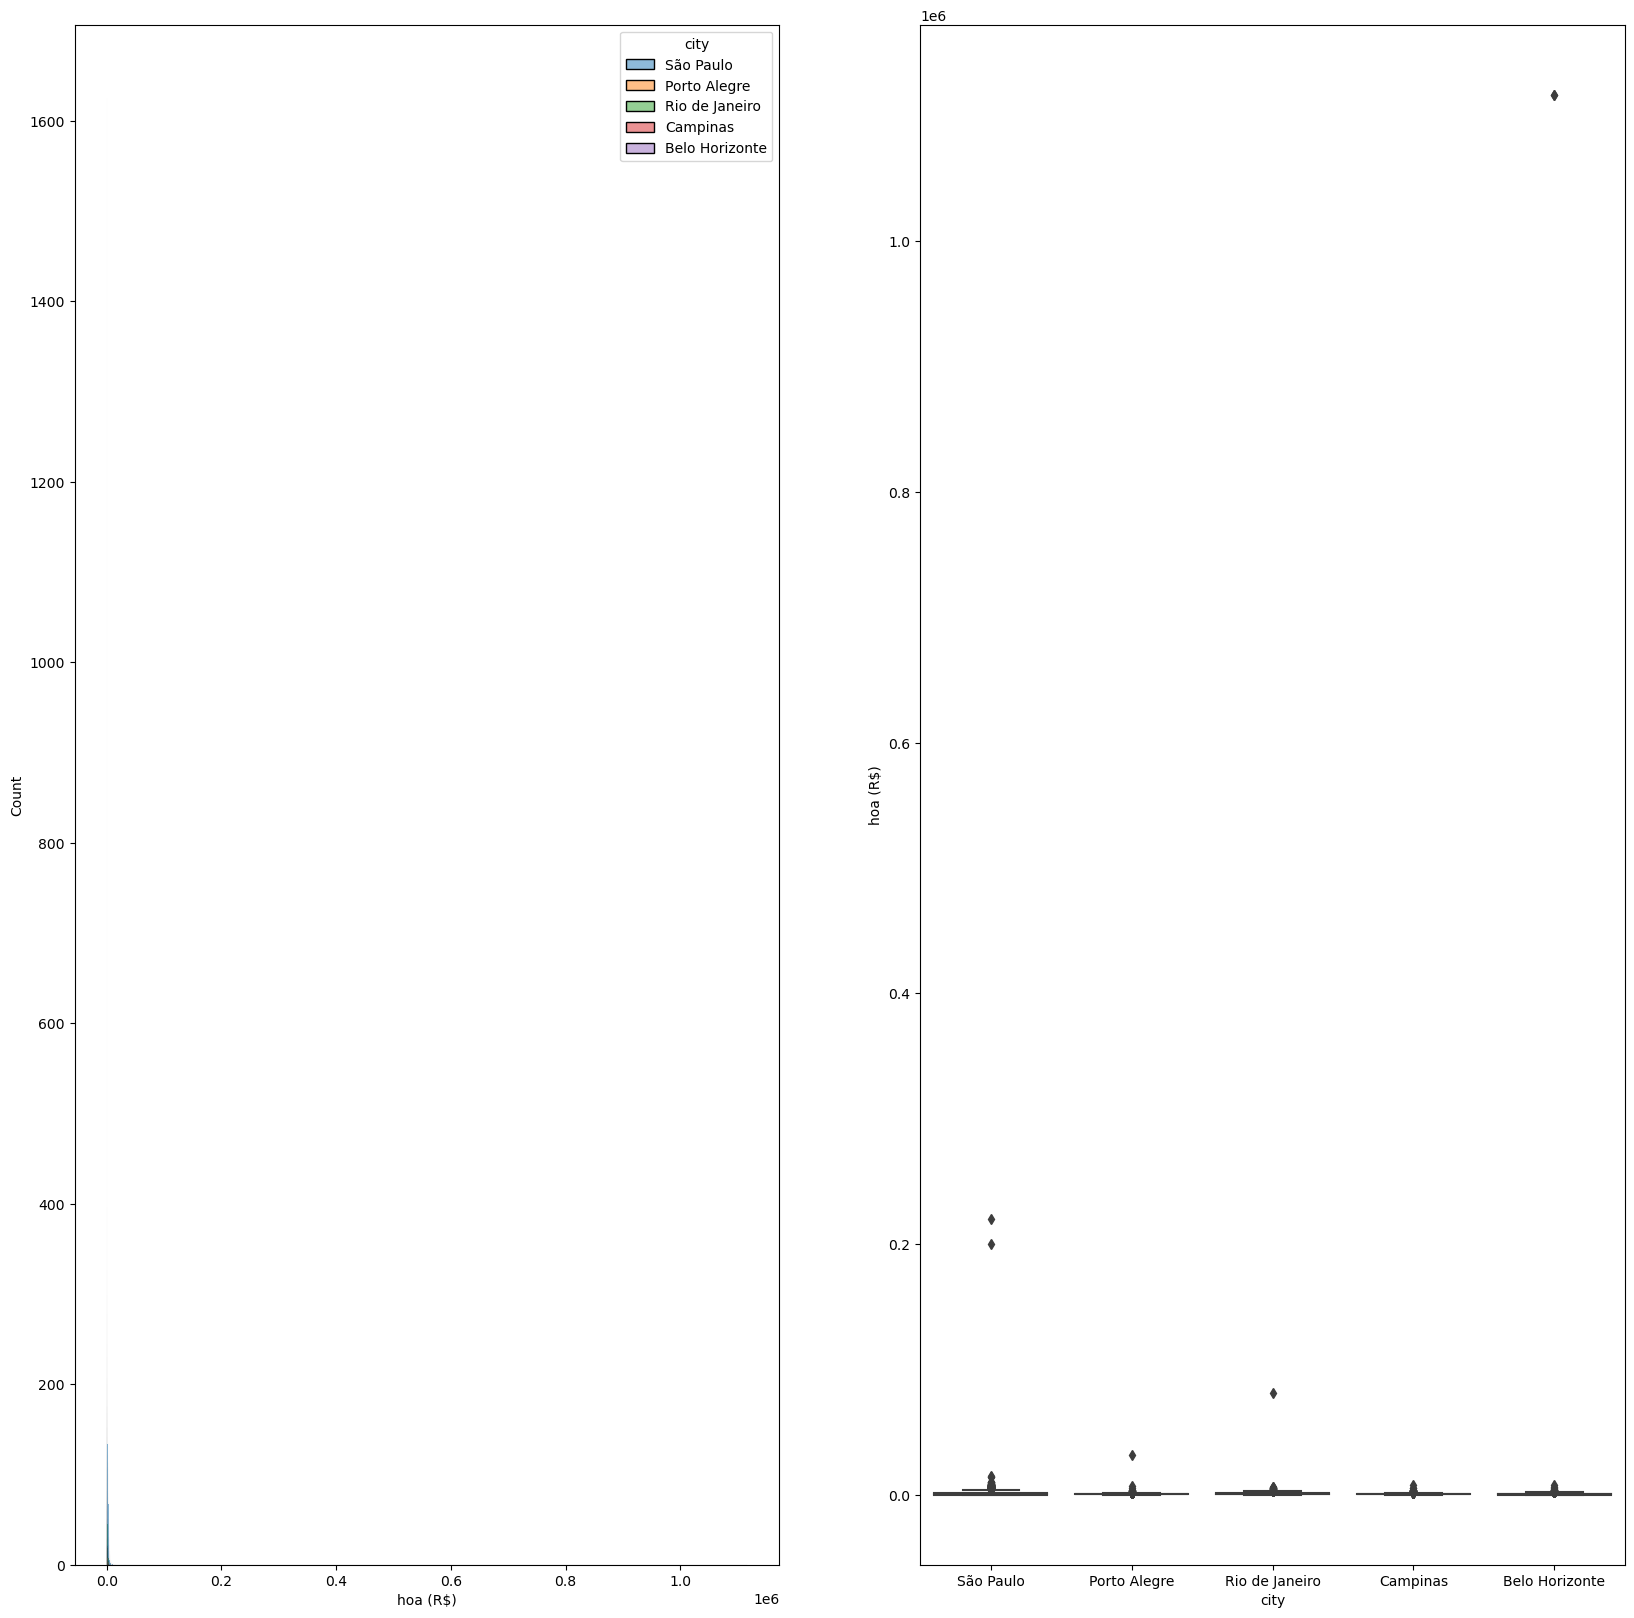

In [59]:
cat_num_analysis('city',"hoa (R$)")

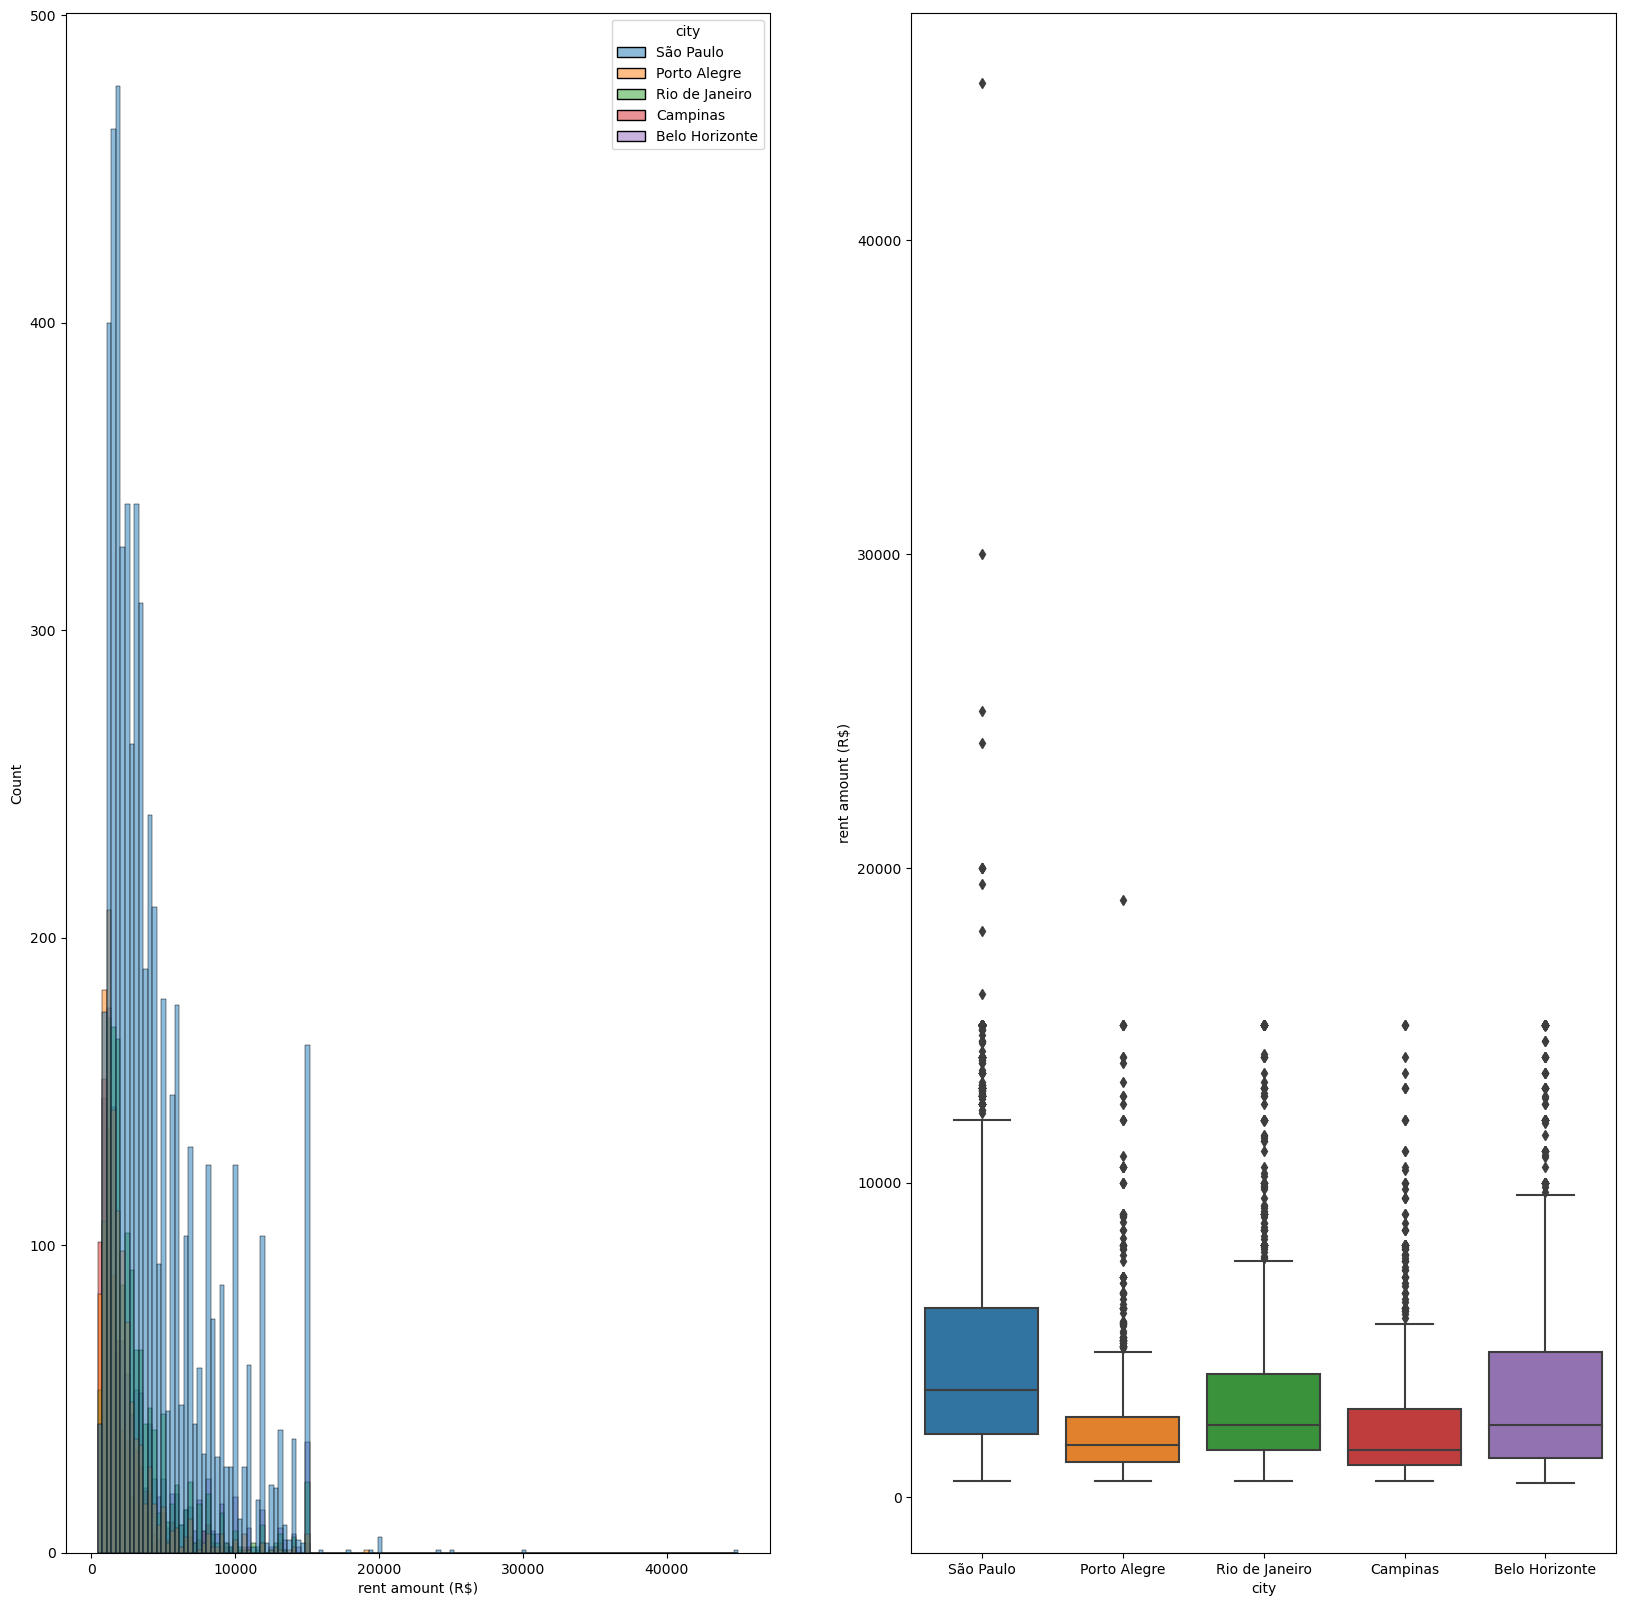

In [60]:
cat_num_analysis('city',"rent amount (R$)")

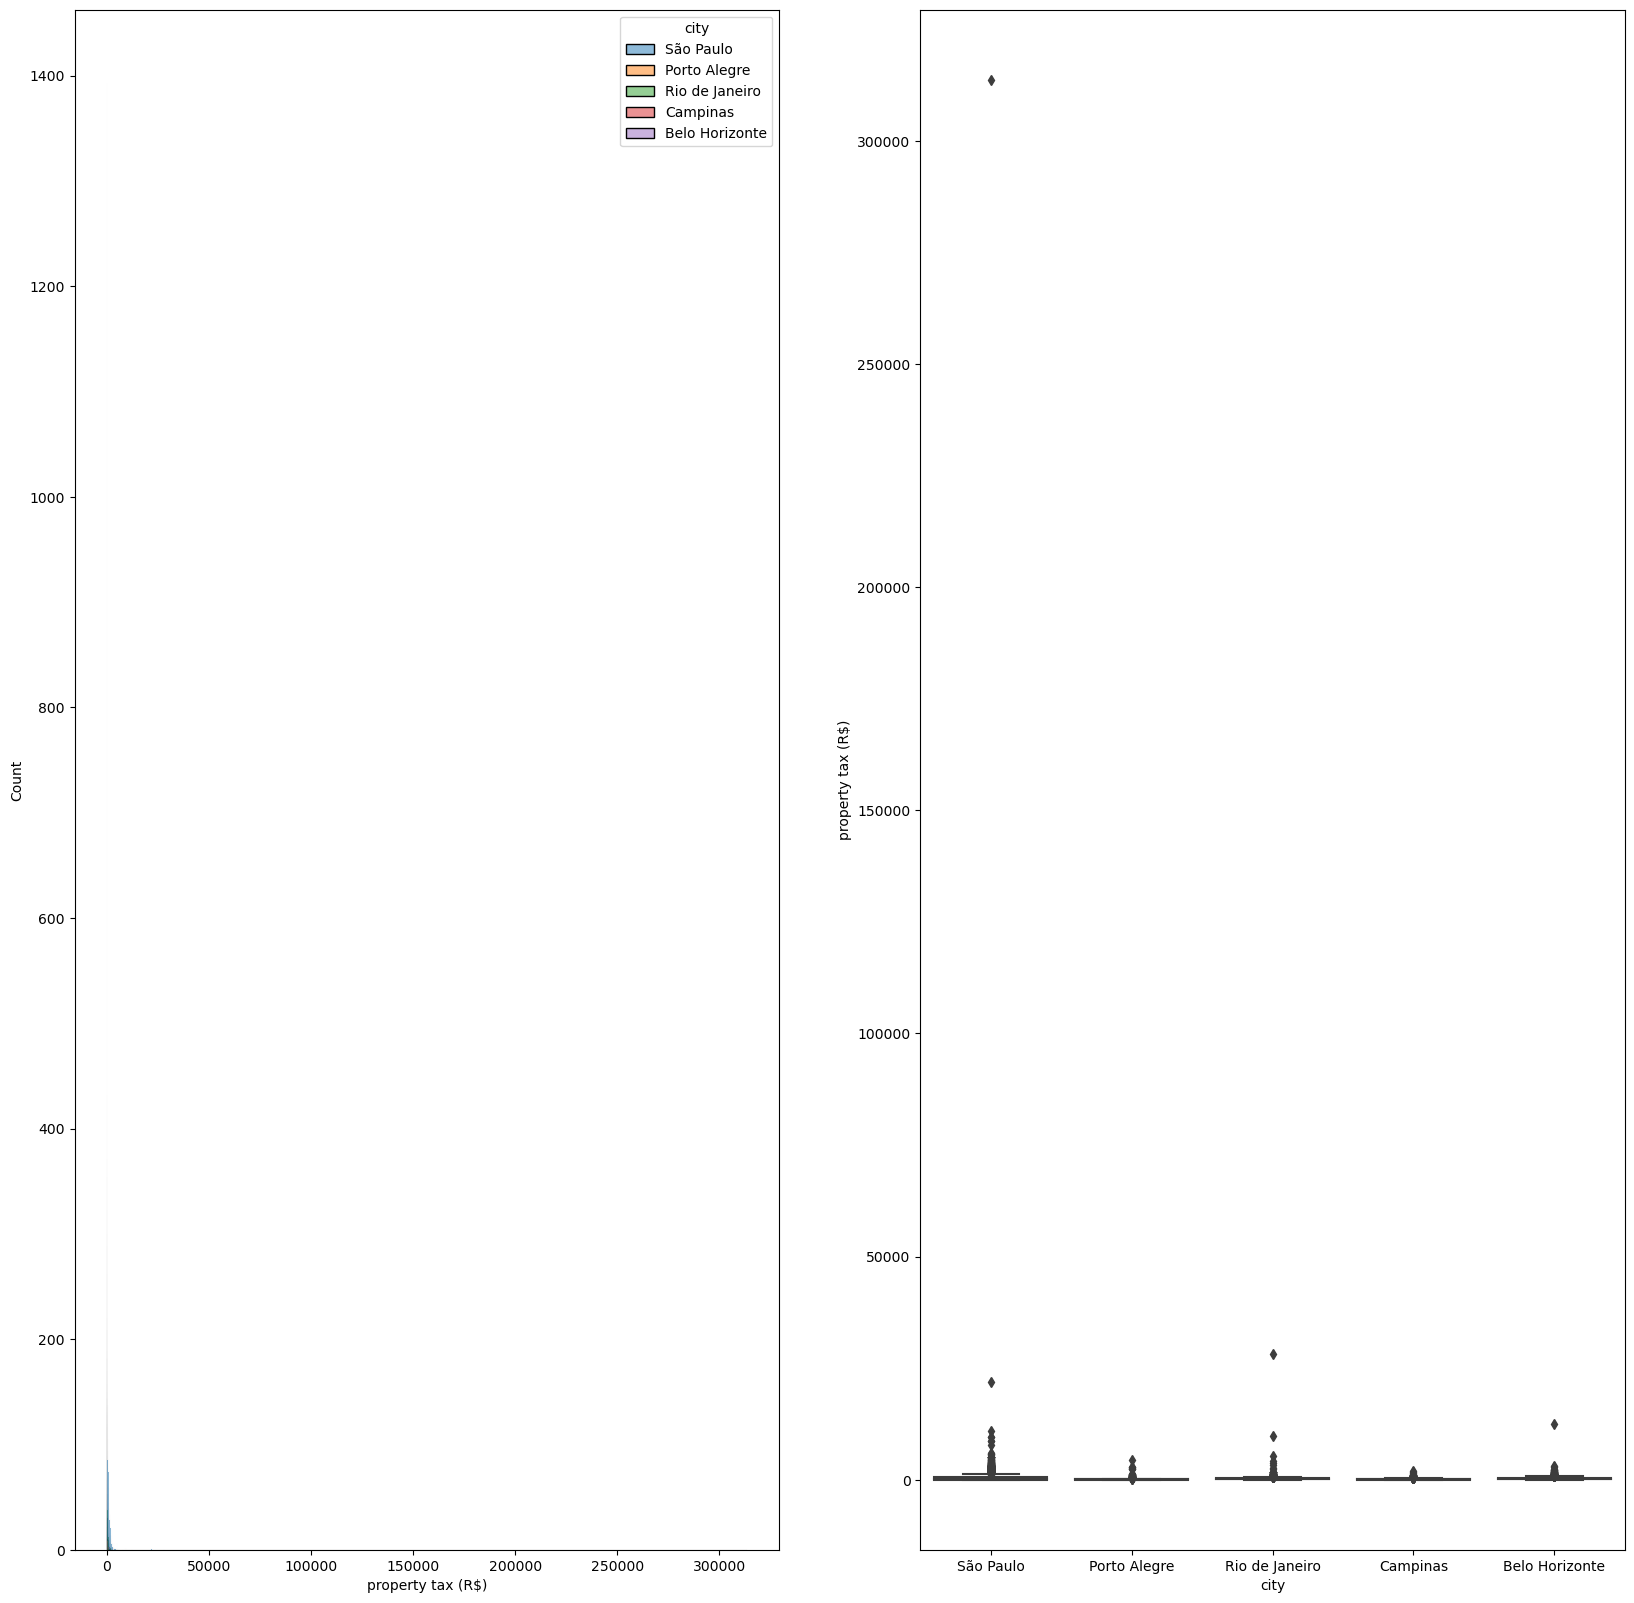

In [61]:
cat_num_analysis('city',"property tax (R$)")

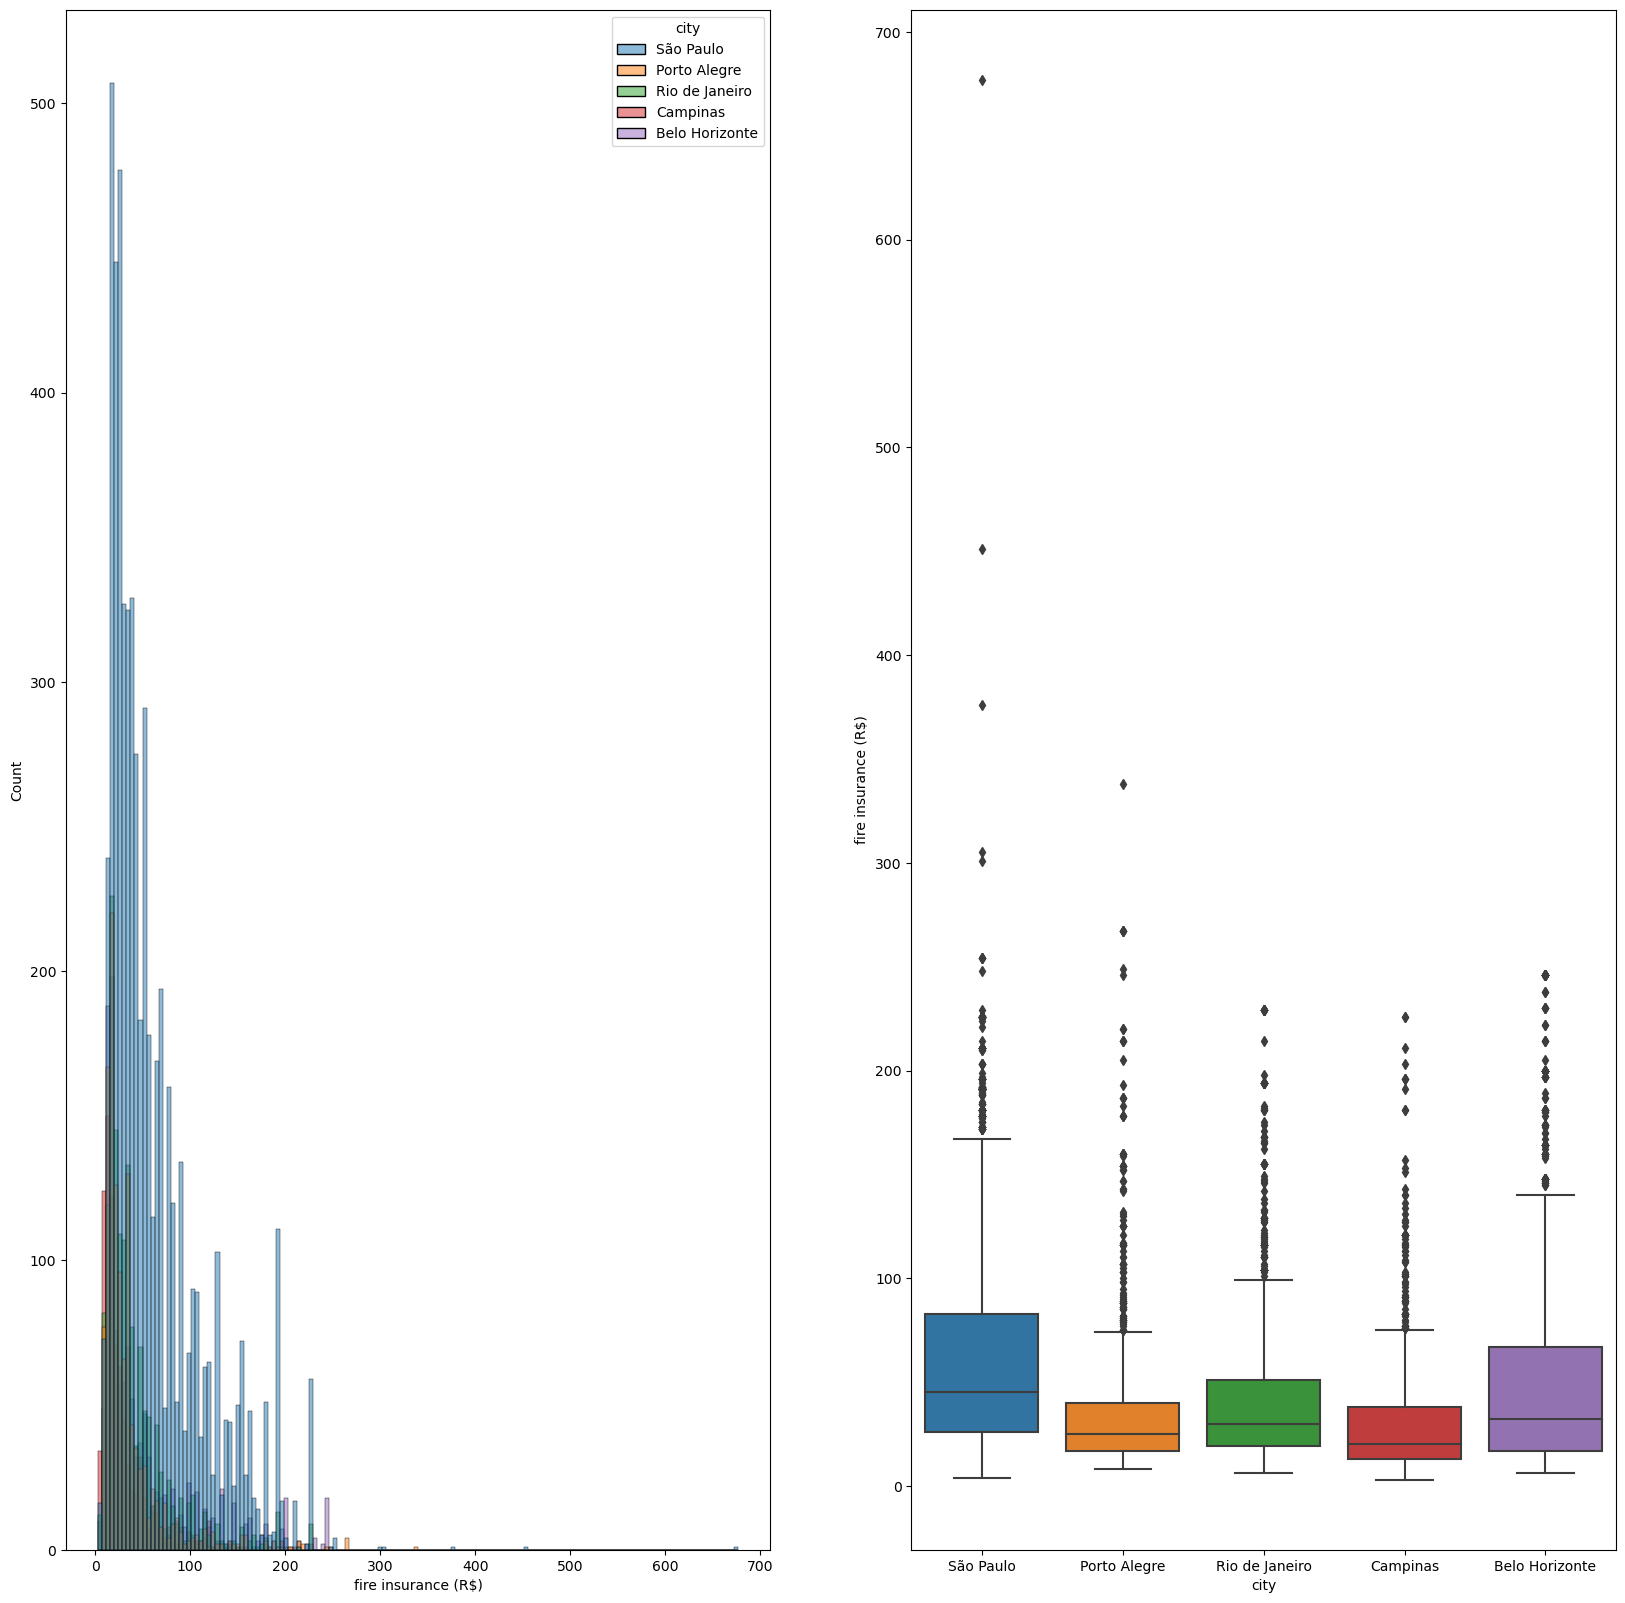

In [62]:
cat_num_analysis('city',"fire insurance (R$)")

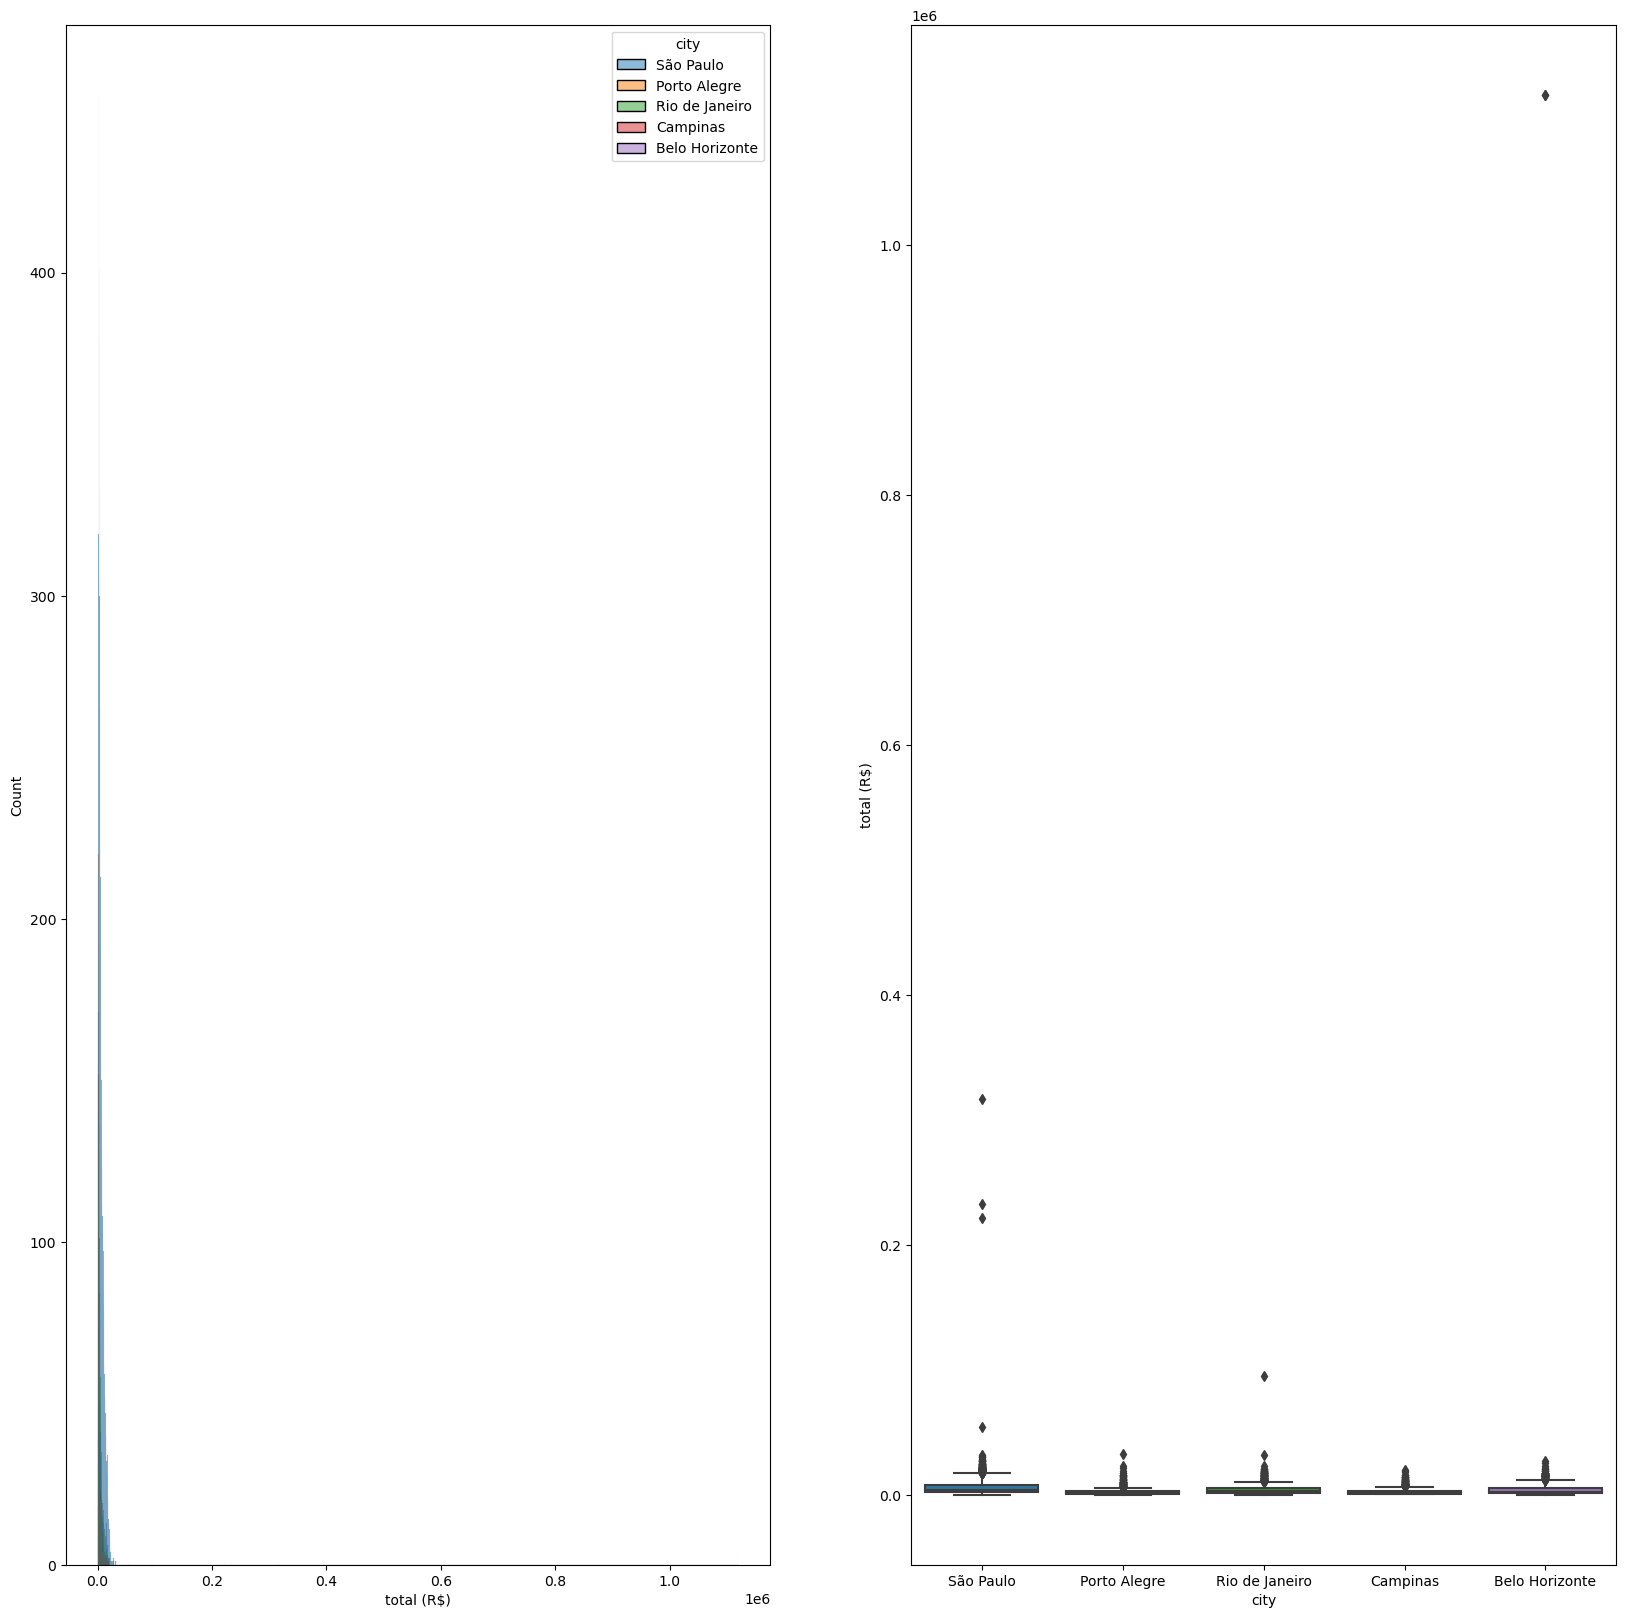

In [63]:
cat_num_analysis('city',"total (R$)")

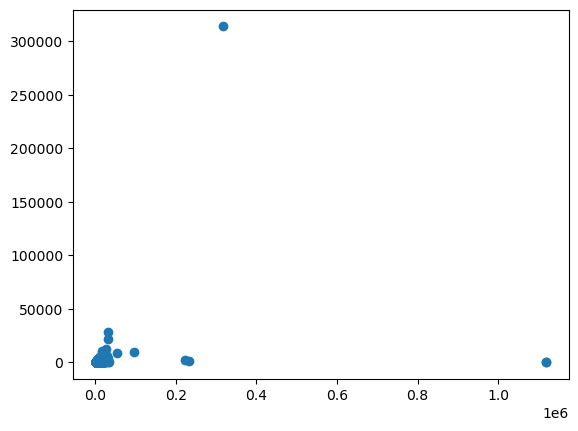

In [64]:
#num_num_analysis

def num_num_analysis(num1,num2):
    plt.scatter(brazil_data[num1],brazil_data[num2])
    plt.title=(num1 +" vs "+ num2 )
    plt.xlabel=(brazil_data[num1])
    plt.ylabel=(brazil_data[num2])
    plt.show()
num_num_analysis("total (R$)","property tax (R$)")

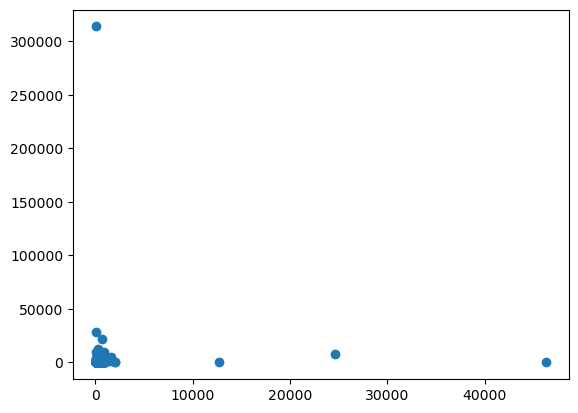

In [65]:
num_num_analysis("area","property tax (R$)")

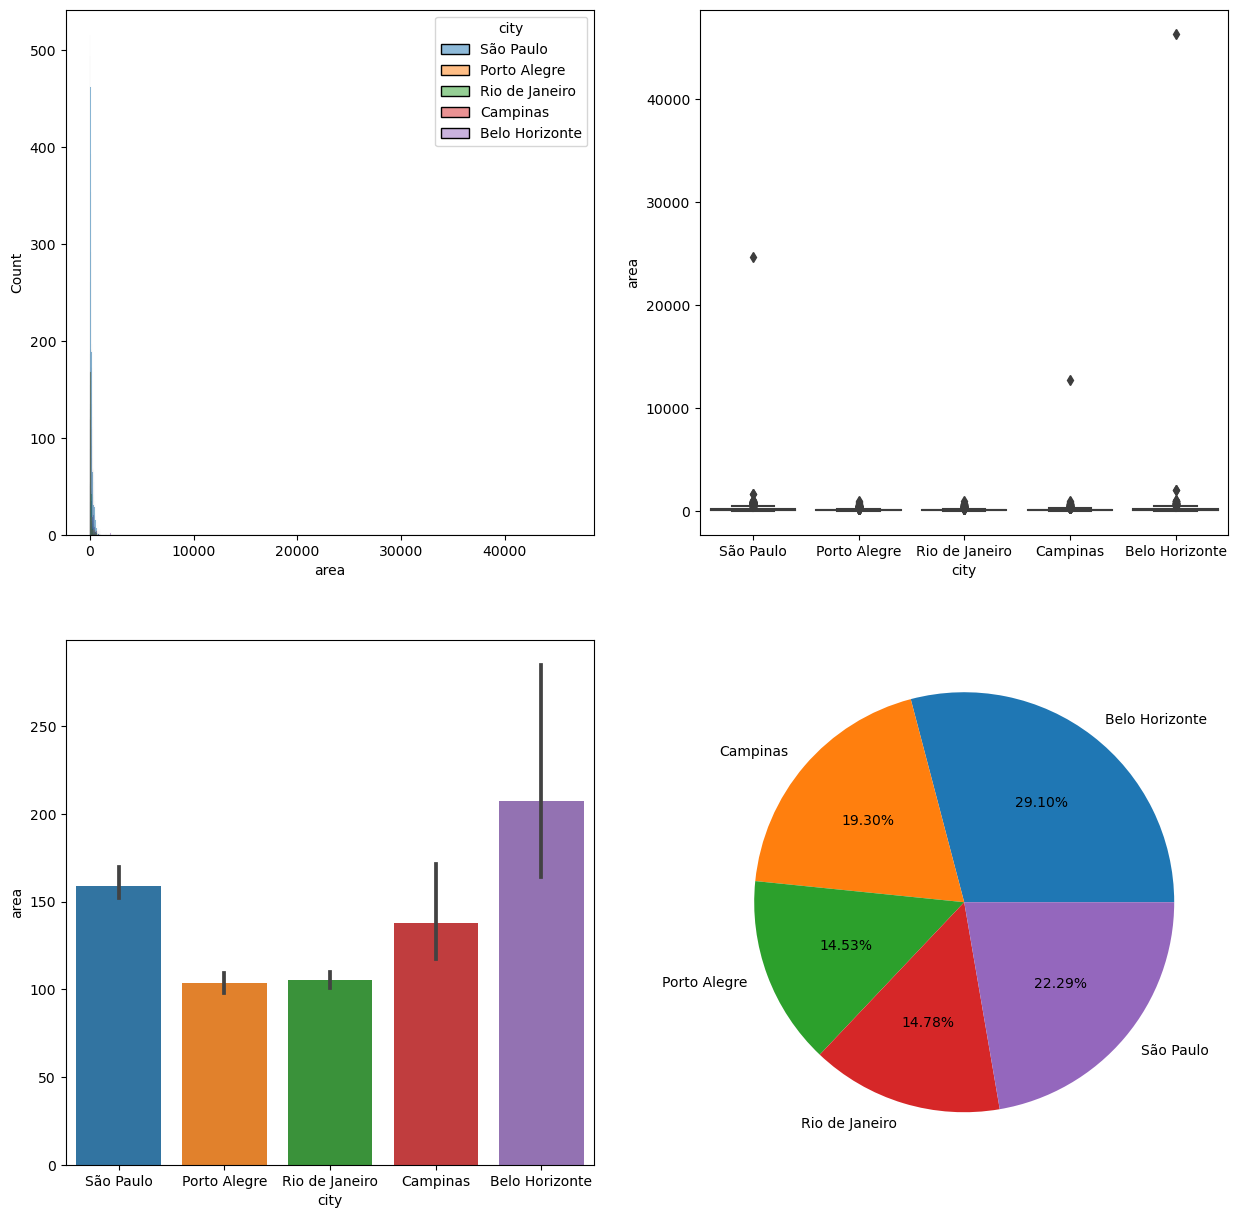

In [66]:
# cat-num analysis

def cat_num_analysis(cat, num):
    x= brazil_data.groupby(cat)[num].mean()    
    fig, ax = plt.subplots(2,2, figsize = (15,15))
    sns.histplot(x = brazil_data[num], hue = brazil_data[cat], ax = ax[0,0])
    sns.boxplot(y = brazil_data[num], x = brazil_data[cat], ax = ax[0,1])
    sns.barplot(x = cat, y = num, data = brazil_data, estimator = np.mean, ax =ax[1,0])
    ax[1,1].pie(x, labels = x.index, autopct = '%0.2f%%')
    
    plt.show()
cat_num_analysis('city','area') 

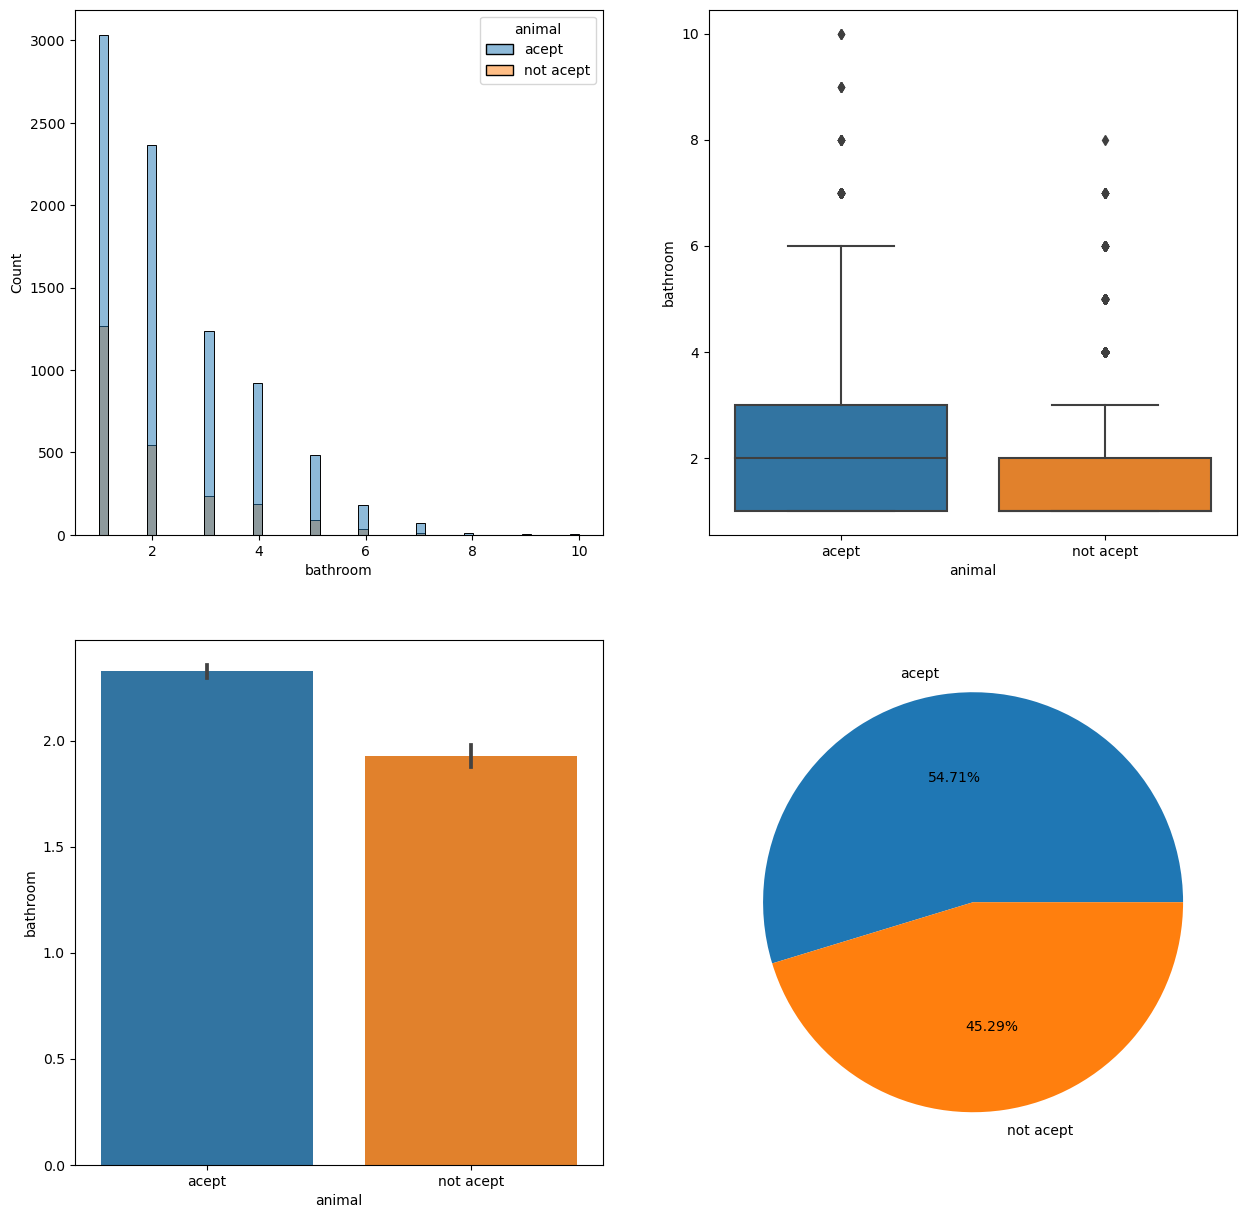

In [67]:
cat_num_analysis('animal','bathroom')

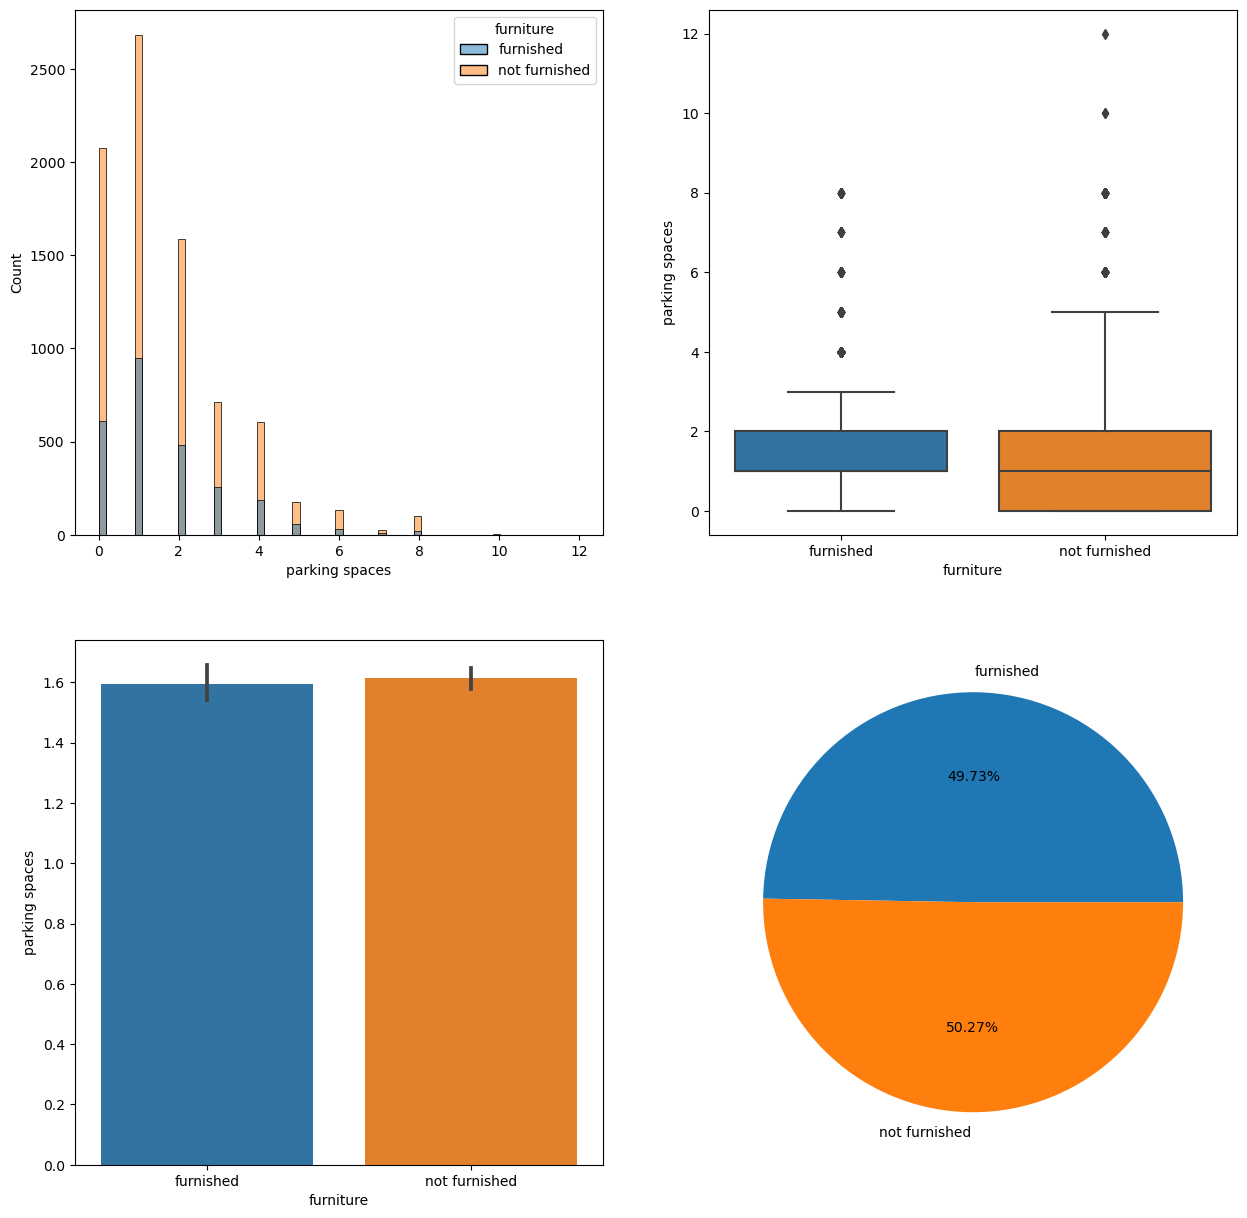

In [68]:
cat_num_analysis('furniture','parking spaces')

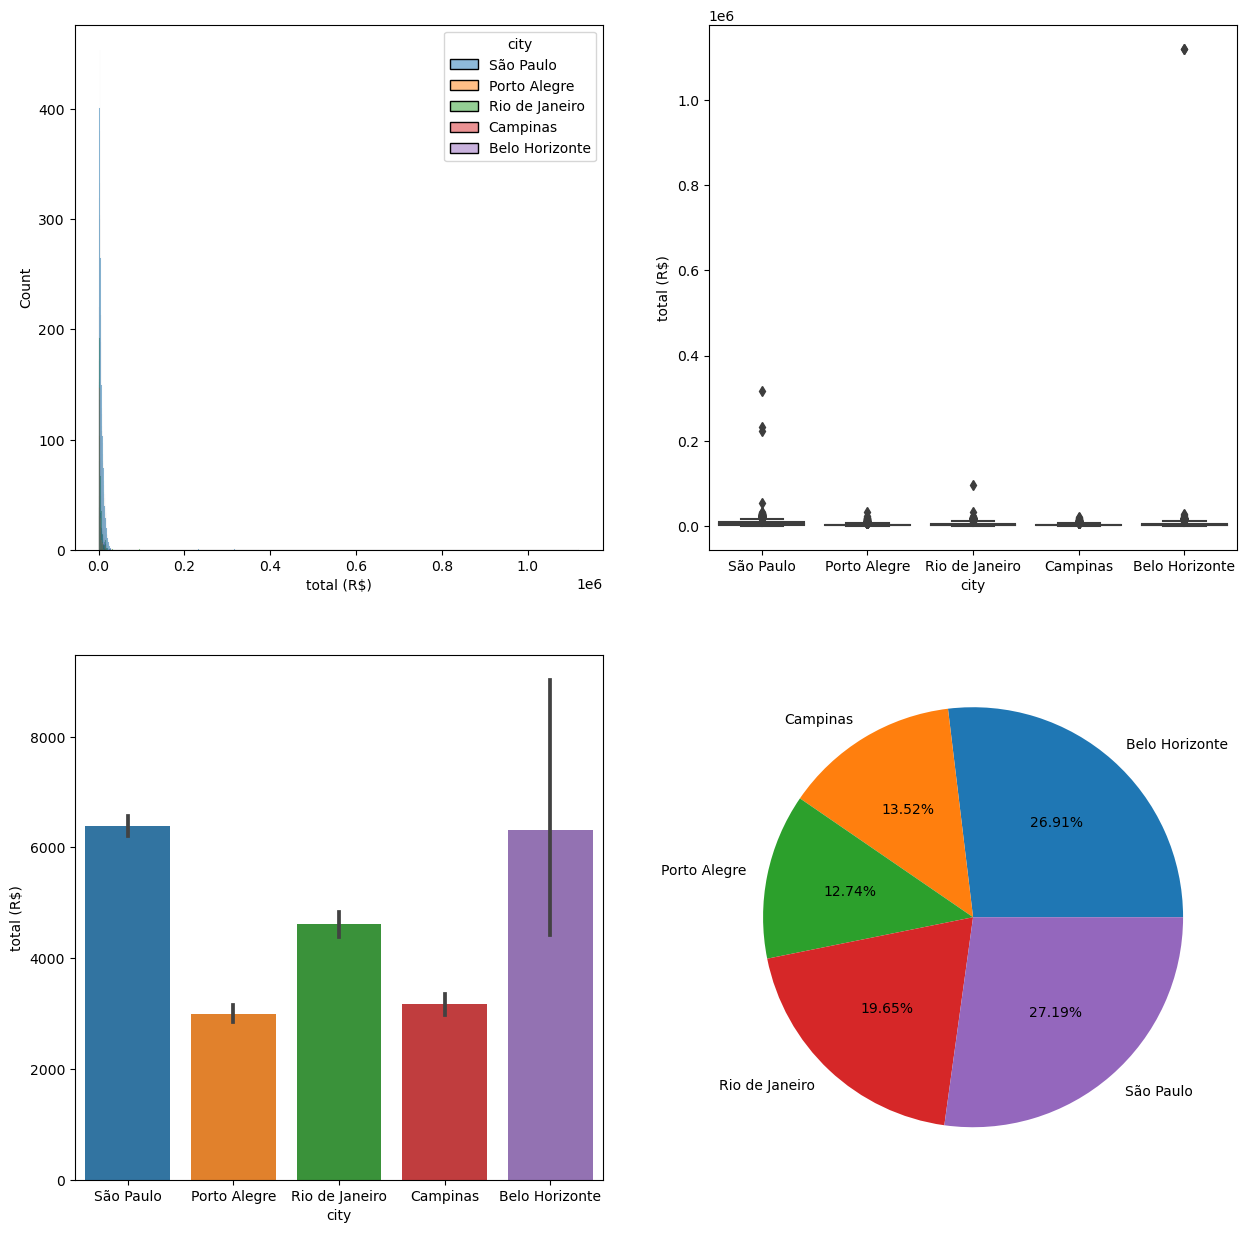

In [69]:
cat_num_analysis('city','total (R$)')

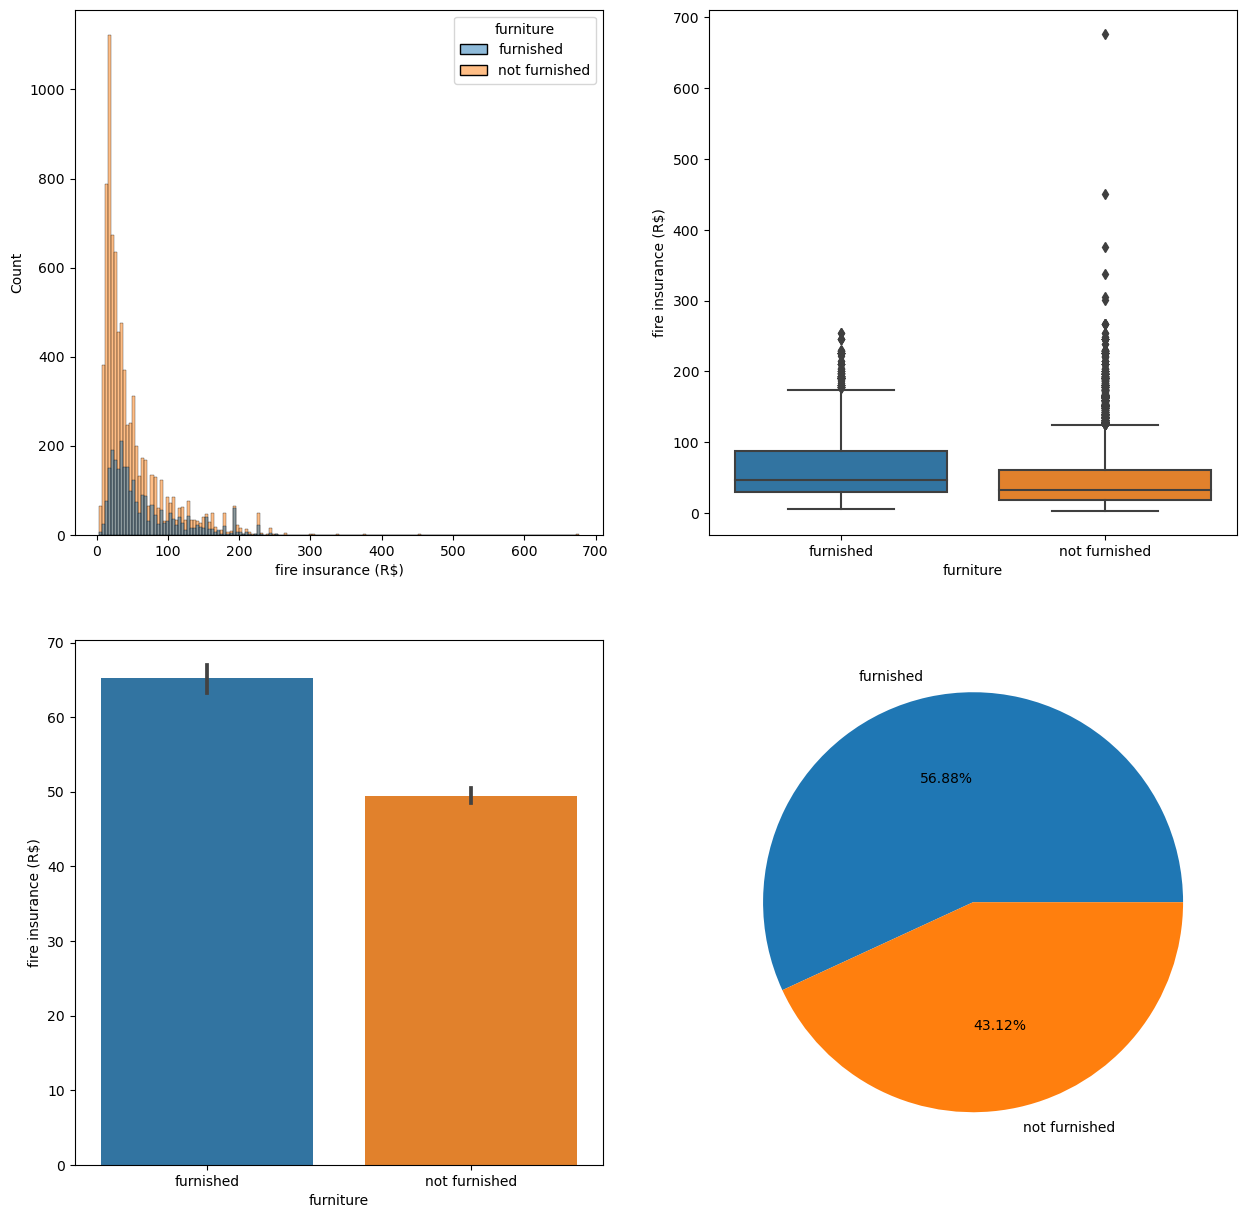

In [70]:
cat_num_analysis('furniture','fire insurance (R$)')

# level 3 Analysis

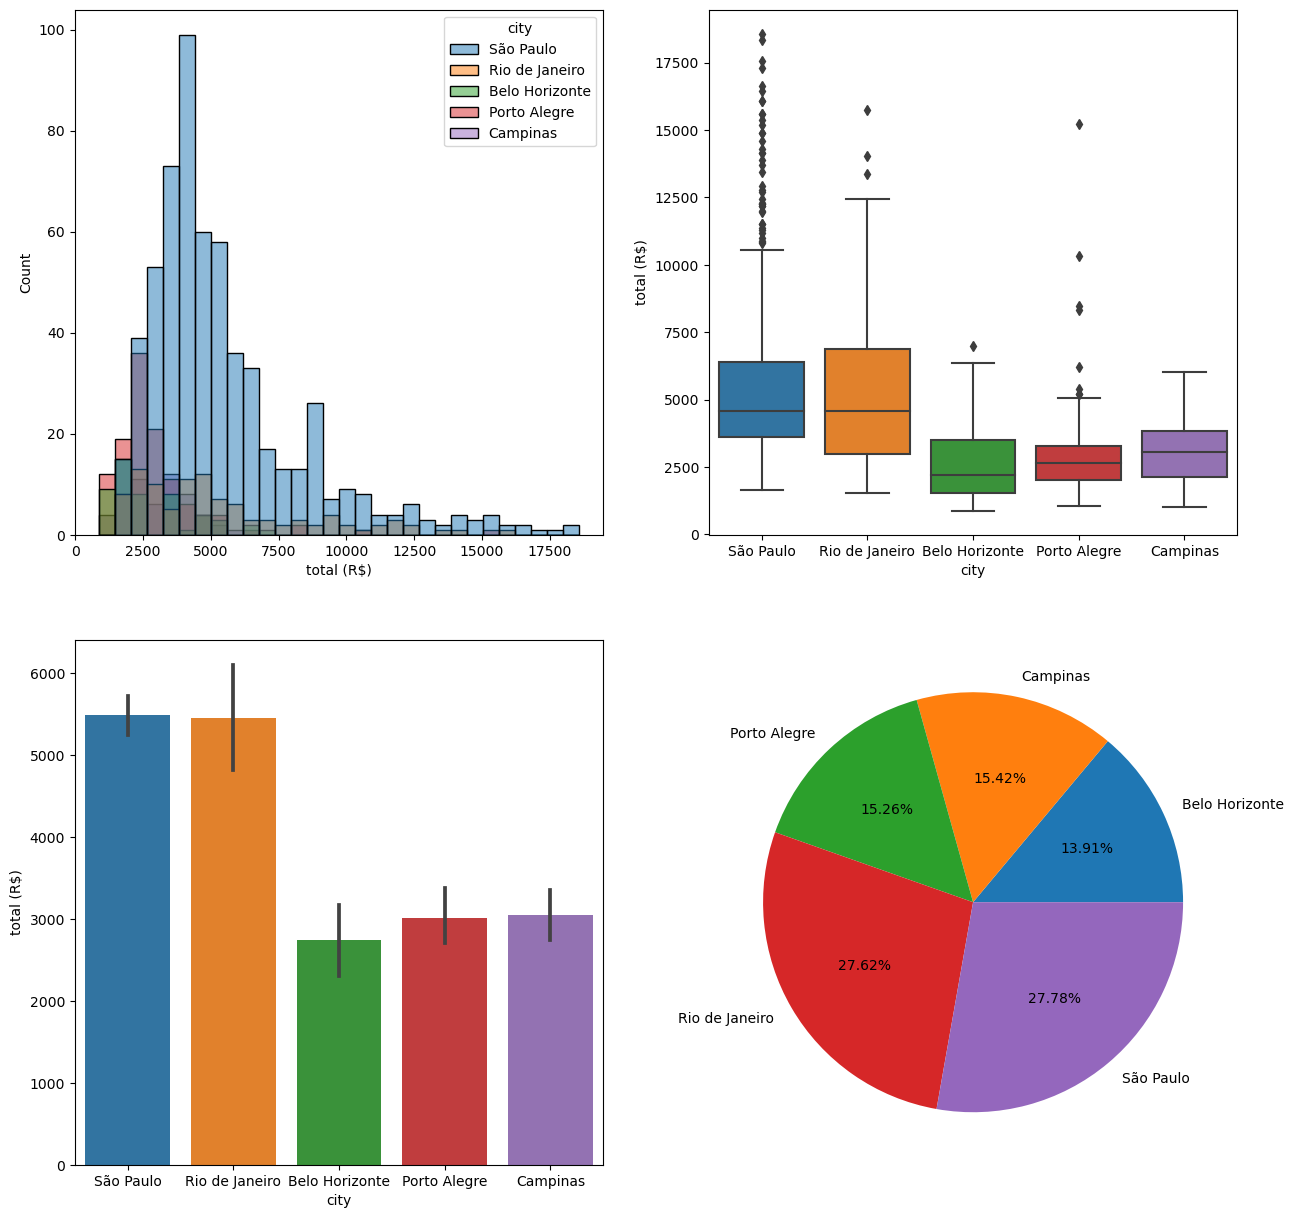

In [71]:
# 1) 

bachelors_data = brazil_data[(brazil_data['rooms'] <= 2) & 
                    (brazil_data['parking spaces'] >=1) &
                    (brazil_data["furniture"] == "furnished")]

x=bachelors_data.groupby("city")["total (R$)"].mean()
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.histplot(x=bachelors_data["total (R$)"],hue=bachelors_data["city"], ax=ax[0,0])
sns.boxplot(y=bachelors_data["total (R$)"],x=bachelors_data["city"], ax=ax[0,1])
sns.barplot(x="city",y="total (R$)",data=bachelors_data,estimator=np.mean,ax=ax[1,0])
ax=ax[1,1].pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

interpretation. If a bachelor looking for a cheap place to live with furnished apartments and parking, "Belo Horizonte" is your best.

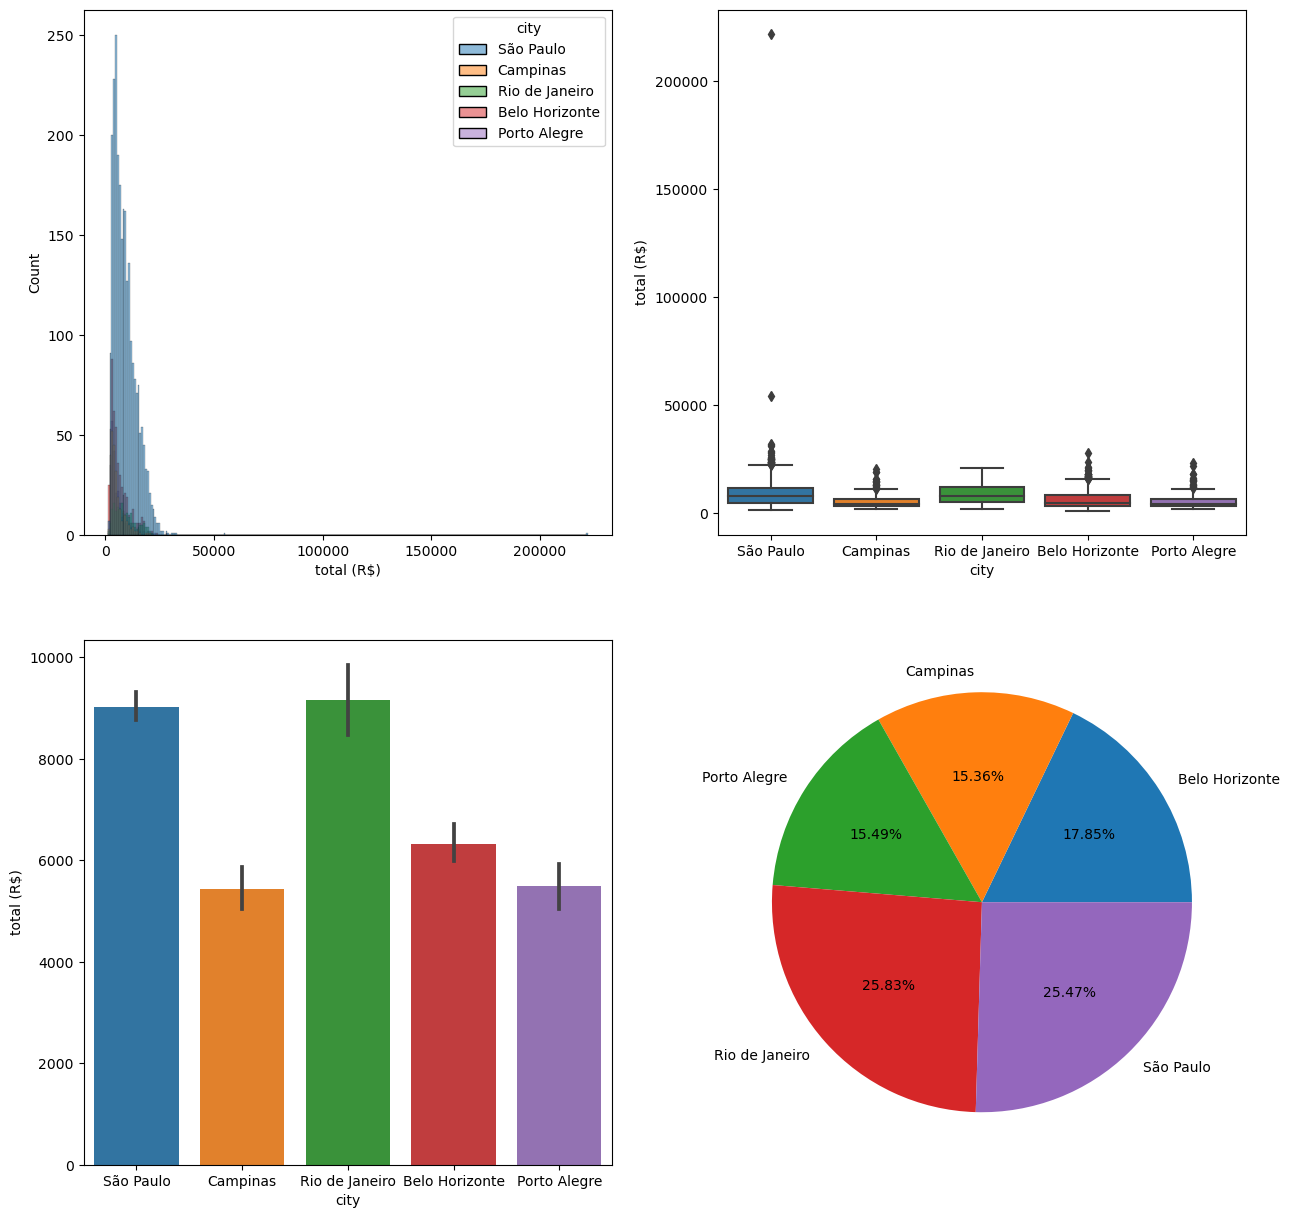

In [72]:
# 2) 

Mid_sized_fam1 = brazil_data[(brazil_data["bathroom"] >= 2) & (brazil_data["parking spaces"] >= 2)  &  (brazil_data['rooms'] <= 4)]

x= Mid_sized_fam1.groupby("city")["total (R$)"].mean()
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.histplot(x=Mid_sized_fam1["total (R$)"],hue=Mid_sized_fam1["city"], ax=ax[0,0])
sns.boxplot(y=Mid_sized_fam1["total (R$)"],x=Mid_sized_fam1["city"], ax=ax[0,1])
sns.barplot(x="city",y="total (R$)",data=Mid_sized_fam1,estimator=np.mean,ax=ax[1,0])
ax=ax[1,1].pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

 interpretation :Belo Horizonte appears to be a suitable city for mid-sized families looking for affordable rental options with good space.

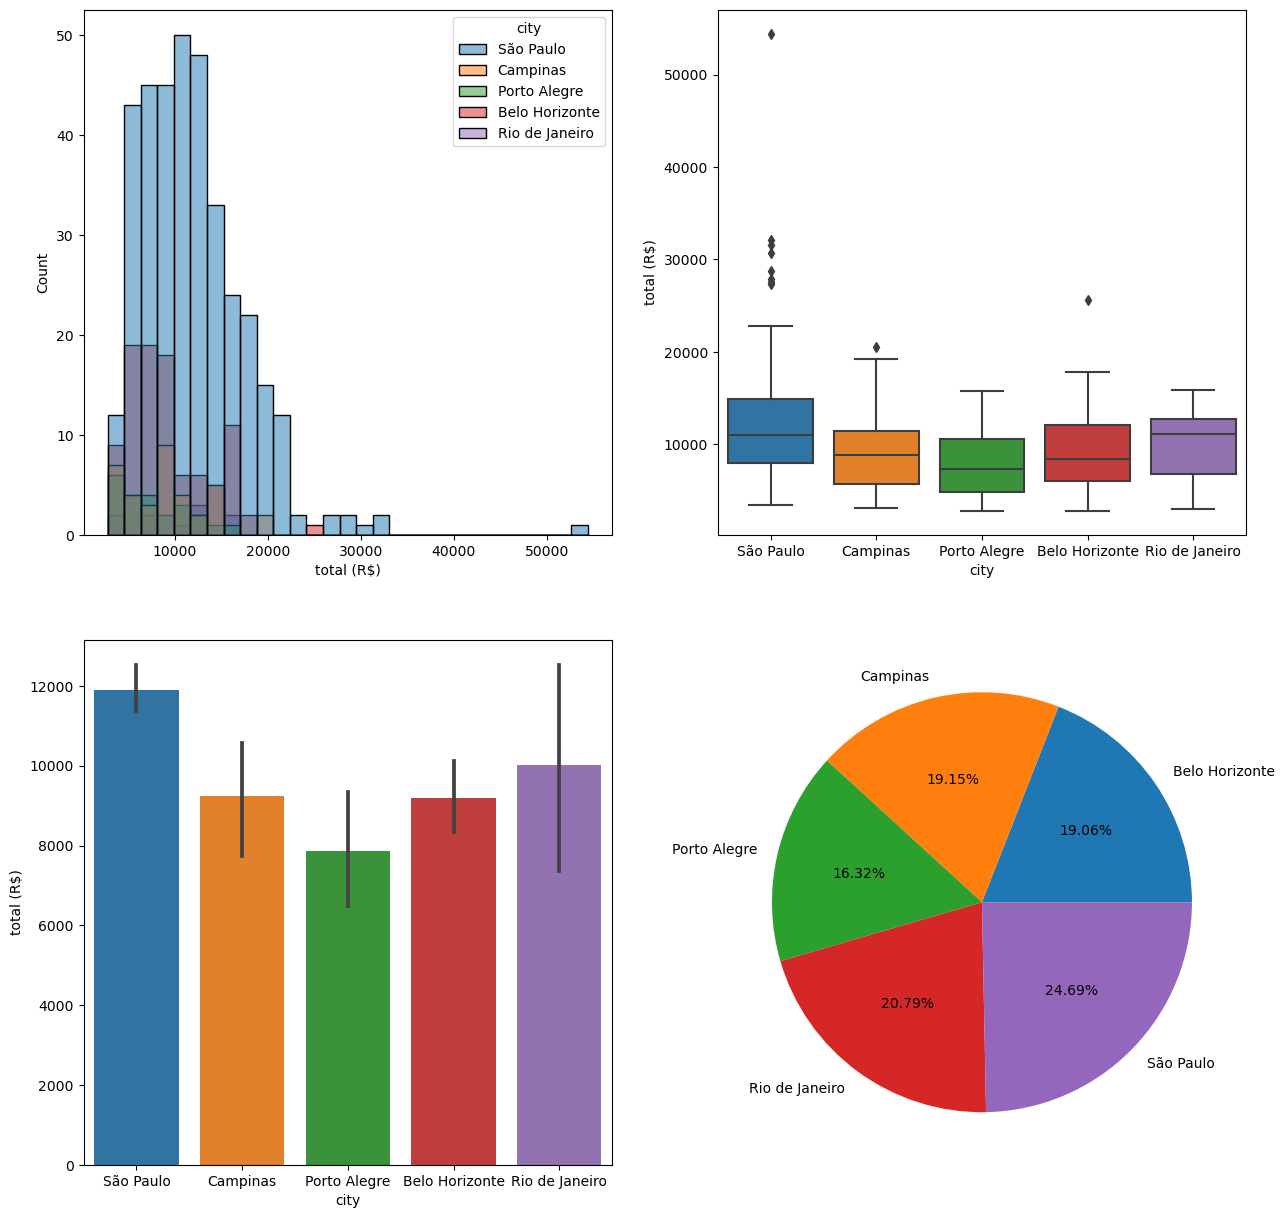

In [73]:
# 3) 

Large_fam = brazil_data[(brazil_data["rooms"] >= 4) & (brazil_data["bathroom"] >= 4) & (brazil_data["parking spaces"] >= 3) & (brazil_data["furniture"] == "not furnished") & (brazil_data["floor"] <= 5)]

x=Large_fam.groupby("city")["total (R$)"].mean()
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.histplot(x=Large_fam["total (R$)"],hue=Large_fam["city"], ax=ax[0,0])
sns.boxplot(y=Large_fam["total (R$)"],x=Large_fam["city"], ax=ax[0,1])
sns.barplot(x="city",y="total (R$)",data=Large_fam,estimator=np.mean,ax=ax[1,0])
ax=ax[1,1].pie(x, labels=x.index, autopct="%0.2f%%")
plt.show()

 interpretation :If large family a lot of space, Porto Alegre, São Paulo, and Belo Horizonte have some big houses that could fit your family comfortably.